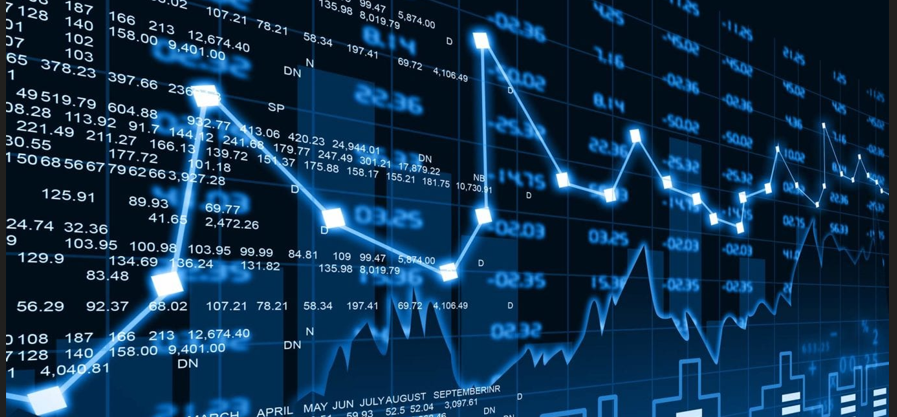



# Introducci√≥n

La Ciencia de Datos es un campo en r√°pido crecimiento que combina herramientas estad√≠sticas y computacionales para extraer conocimiento valioso a partir de los datos. Esta disciplina integra √°reas como matem√°ticas, estad√≠stica, inform√°tica y conocimientos espec√≠ficos del dominio financiero, generando un enfoque integral para entender patrones complejos.

El prop√≥sito principal de la Ciencia de Datos es ofrecer una visi√≥n completa de los datos y transformarla en informaci√≥n accionable que facilite decisiones empresariales, descubrimientos cient√≠ficos e incluso pol√≠ticas p√∫blicas. En un mundo donde la generaci√≥n de datos es constante y masiva, esta disciplina se vuelve cada vez m√°s esencial para comprender nuestro entorno basado en datos.

En el √°mbito financiero, la Ciencia de Datos se puede aplicar de diversas formas, tales como:

1. **Modelos Predictivos:** Los profesionales en Ciencia de Datos pueden utilizar datos hist√≥ricos para construir modelos que identifiquen tendencias y realicen predicciones sobre las condiciones futuras del mercado.

2. **Trading Algor√≠tmico:** El uso de algoritmos permite ejecutar √≥rdenes de compra y venta de forma autom√°tica, bas√°ndose en modelos matem√°ticos que analizan precio, volumen, volatilidad, entre otros factores.

3. **Optimizaci√≥n de Portafolios:** A trav√©s de algoritmos y modelos matem√°ticos, se pueden construir portafolios financieros que maximicen los retornos esperados mientras minimizan los riesgos.

4. **Detecci√≥n de Fraudes:** Los cient√≠ficos de datos pueden aplicar algoritmos de aprendizaje autom√°tico para identificar actividades fraudulentas en transacciones financieras.

5. **Gesti√≥n de Riesgos:** La Ciencia de Datos permite cuantificar y gestionar diferentes tipos de riesgo financiero, como riesgo de mercado, de cr√©dito y operativo.

6. **An√°lisis de Clientes:** Las instituciones financieras pueden analizar el comportamiento y las preferencias de sus clientes para mejorar la retenci√≥n, la personalizaci√≥n de servicios y la experiencia general del usuario.

---

## Objetivo del Notebook

Este cuaderno tiene como objetivo mostrar c√≥mo la Ciencia de Datos, junto con Python, puede ser una herramienta poderosa para extraer informaci√≥n valiosa de los mercados financieros. A lo largo del notebook, se demostrar√° c√≥mo utilizar estas herramientas para construir y optimizar portafolios, desarrollar estrategias de inversi√≥n efectivas y realizar an√°lisis detallado de acciones.

Con esto se busca resaltar la versatilidad y utilidad de aplicar Ciencia de Datos y Python en el sector financiero, brindando un recurso valioso para quienes desean tomar decisiones de inversi√≥n fundamentadas en datos.


## Librer√≠as utilizadas

A lo largo de este proyecto se utilizar√°n diversas bibliotecas de Python ampliamente reconocidas en el √°mbito de las finanzas cuantitativas y la ciencia de datos. Estas herramientas permiten desde la descarga de datos financieros hasta su visualizaci√≥n, an√°lisis estad√≠stico, optimizaci√≥n de portafolios y creaci√≥n de modelos predictivos. A continuaci√≥n, se describen brevemente:

- **NumPy**: Librer√≠a fundamental para operaciones num√©ricas y manejo de arrays.
- **Pandas**: Herramienta esencial para la manipulaci√≥n y an√°lisis de datos estructurados, como series temporales financieras.
- **Matplotlib** y **Seaborn**: Bibliotecas de visualizaci√≥n de datos, utilizadas para representar gr√°ficamente precios, rendimientos, distribuciones, correlaciones, etc.
- **yfinance**: Permite descargar datos financieros hist√≥ricos de Yahoo Finance de forma sencilla y r√°pida.
- **Plotly**: Ideal para generar gr√°ficos interactivos de alta calidad, √∫tiles para presentar an√°lisis.
- **Statsmodels**: Biblioteca especializada en modelos estad√≠sticos y pruebas econom√©tricas.
- **Scikit-learn**: Conjunto completo de algoritmos de machine learning para tareas de clasificaci√≥n, regresi√≥n y clustering.
- **PyPortfolioOpt**: Implementa algoritmos de optimizaci√≥n moderna de portafolios como media-varianza y frontera eficiente.
- **QuantStats**: Genera an√°lisis de desempe√±o de portafolios con estad√≠sticas, gr√°ficos y reportes autom√°ticos.
- **TA (Technical Analysis Library)**: Biblioteca con indicadores t√©cnicos cl√°sicos para an√°lisis de trading, como RSI, MACD, Bollinger Bands, entre otros.


In [183]:
#Aqu√≠ instalamos yfinance:
!pip install yfinance --upgrade

In [184]:
# Instalando Quantstats
!pip install quantstats --upgrade

In [185]:
# Instalando PyPortfolioOpt
!pip install pyportfolioopt --upgrade

In [186]:
# Instalando TA (Technical Analysis) para an√°lisis t√©cnico
!pip install ta --upgrade

In [187]:
!pip install ace_tools # installing the required library to resolve ModuleNotFoundError

In [188]:
# Aqu√≠ importamos otras librer√≠as que nos ser√°n de utiliad para el an√°lisis

# Manejo de datos y an√°lisis estad√≠stico
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Visualizaci√≥n de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimizaci√≥n y asignaci√≥n
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel



# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Para habilitar Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime y warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [189]:
# Financial data
import quantstats as qs
import ta
import yfinance as yf

## Selecci√≥n de acciones para el an√°lisis

Para este estudio, se ha elegido un conjunto de cuatro acciones pertenecientes a distintas industrias clave del mercado estadounidense. El objetivo es comparar su comportamiento en t√©rminos de rendimientos diarios, permitiendo observar patrones de volatilidad, consistencia en el crecimiento y posibles correlaciones entre sectores. Las empresas seleccionadas son:

- **AAPL (Apple Inc.)**: Referente del sector tecnol√≥gico y de consumo, combina innovaci√≥n en hardware, software y servicios digitales.
- **MSFT (Microsoft Corp.)**: Empresa l√≠der en software empresarial, servicios en la nube y soluciones tecnol√≥gicas globales.
- **NVDA (Nvidia Corp.)**: Actor principal en el desarrollo de semiconductores y procesamiento gr√°fico, altamente relevante en el contexto de inteligencia artificial y computaci√≥n acelerada.
- **JPM (JPMorgan Chase & Co.)**: El banco m√°s grande de Estados Unidos por activos, representando el sector financiero tradicional.

Esta combinaci√≥n permite contrastar el desempe√±o de empresas tecnol√≥gicas con una entidad financiera, y observar c√≥mo reaccionan ante diferentes condiciones de mercado, generando as√≠ un an√°lisis m√°s robusto y realista.

A continuaci√≥n, se descargan los datos hist√≥ricos de precios para el periodo comprendido entre el **1 de enero de 2023** y el **31 de marzo de 2025**. Se utiliza la biblioteca `yfinance` con el par√°metro `auto_adjust=False` para mantener expl√≠citamente la columna `'Adj Close'`, que representa el precio ajustado de cierre, utilizado com√∫nmente para calcular rendimientos y an√°lisis posteriores.


## 1 | Primeros pasos: Retornos diarios

Una de las primeras m√©tricas que analizaremos es el **retorno diario**, que representa el cambio porcentual en el precio de una acci√≥n de un d√≠a al siguiente. Este indicador es fundamental porque permite observar c√≥mo var√≠a el valor de un activo en cortos periodos de tiempo, facilitando el an√°lisis de su comportamiento reciente.

El c√°lculo se realiza restando el precio de cierre del d√≠a anterior al del d√≠a actual, dividiendo esa diferencia entre el precio de cierre anterior y multiplicando el resultado por 100 para expresarlo en porcentaje.

Por ejemplo, si una acci√≥n cierra el lunes en 100 d√≥lares y el martes en 102 d√≥lares, su retorno diario se calcula as√≠:

$$
\left( \frac{102 - 100}{100} \right) \times 100 = 2\%
$$

Esto indica que el valor de la acci√≥n aument√≥ un 2% en un solo d√≠a.

Por el contrario, si la acci√≥n hubiese cerrado en 98 d√≥lares el martes, el retorno diario ser√≠a:

$$
\left( \frac{98 - 100}{100} \right) \times 100 = -2\%
$$

Lo cual refleja una disminuci√≥n del 2% en su valor respecto al d√≠a anterior.

Los retornos diarios son especialmente √∫tiles para los inversionistas, ya que permiten monitorear de forma r√°pida y continua la evoluci√≥n de un activo, evaluar su volatilidad y consistencia, y tomar decisiones informadas a partir del comportamiento reciente del mercado.


In [190]:
import yfinance as yf
import pandas as pd

# Definir fechas
start_date = '2023-01-01'
end_date = '2025-03-31'

# Descargar datos uno por uno con auto_adjust=False
aapl = yf.download('AAPL', start=start_date, end=end_date, auto_adjust=False)
aapl['Ticker'] = 'AAPL'

msft = yf.download('MSFT', start=start_date, end=end_date, auto_adjust=False)
msft['Ticker'] = 'MSFT'

nvda = yf.download('NVDA', start=start_date, end=end_date, auto_adjust=False)
nvda['Ticker'] = 'NVDA'

jpm = yf.download('JPM', start=start_date, end=end_date, auto_adjust=False)
jpm['Ticker'] = 'JPM'

# Mostrar las primeras filas de AAPL como ejemplo
aapl.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.632523  125.070000  130.899994  124.169998  130.279999   
2023-01-04  124.907700  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.583099  125.019997  127.769997  124.760002  127.129997   
2023-01-06  128.130219  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.654144  130.149994  133.410004  129.889999  130.470001   

Price          Volume Ticker  
Ticker           AAPL         
Date                          
2023-01-03  112117500   AAPL  
2023-01-04   89113600   AAPL  
2023-01-05   80962700   AAPL  
2023-01-06   87754700   AAPL  
2023-01-09   70790800   AAPL

##Obtenemos ahora los retornos d√≠arios para cada una de las acciones elegidas

In [191]:
#APPLE
aapl=qs.utils.download_returns('AAPL')
aapl=aapl.loc['2023-01-03':'2025-03-28']

In [192]:
#MSFT
msft=qs.utils.download_returns('MSFT')
msft=msft.loc['2023-01-03':'2025-03-28']

In [193]:
#NVDA
nvda=qs.utils.download_returns('NVDA')
nvda=nvda.loc['2023-01-03':'2025-03-28']

In [194]:
#JPM
jpm=qs.utils.download_returns('JPM')
jpm=jpm.loc['2023-01-03':'2025-03-28']

In [195]:
jpm.size

561

In [196]:
# Trabajando la zona horaria


aapl.index = aapl.index.tz_localize('America/New_York').tz_convert(None)
msft.index = msft.index.tz_localize('America/New_York').tz_convert(None)
nvda.index = nvda.index.tz_localize('America/New_York').tz_convert(None)
jpm.index = jpm.index.tz_localize('America/New_York').tz_convert(None)

## Ahora ya podemos graficar los retornos diarios para cada Stock

In [154]:
#JPM
!pip install yfinance
!pip install quantstats
import yfinance as yf
import quantstats as qs
import pandas as pd

# Downloading JPM's data using yfinance and handling errors
try:
  jpm = yf.download('JPM', start='2023-01-03', end='2025-03-28')['Adj Close']
  jpm = jpm.pct_change()  # Calculate daily returns
except Exception as e:
  print(f"Error downloading or processing JPM data: {e}")
  # Handle the error, e.g., exit or use default data

aapl = yf.download('AAPL', start='2023-01-03', end='2025-03-28')['Adj Close']
aapl = aapl.pct_change()  # Calculate daily returns
msft = yf.download('MSFT', start='2023-01-03', end='2025-03-28')['Adj Close']
msft = msft.pct_change()  # Calculate daily returns
nvda = yf.download('NVDA', start='2023-01-03', end='2025-03-28')['Adj Close']
nvda = nvda.pct_change()  # Calculate daily returns


# Working with the time zone
aapl.index = aapl.index.tz_localize('America/New_York').tz_convert(None)
msft.index = msft.index.tz_localize('America/New_York').tz_convert(None)
nvda.index = nvda.index.tz_localize('America/New_York').tz_convert(None)
jpm.index = jpm.index.tz_localize('America/New_York').tz_convert(None)


# Plotting daily returns for Apple
print('\n')
print('\nRetornos diarios Apple:\n')
qs.plots.daily_returns(aapl, benchmark=None)

ERROR: Operation cancelled by user


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Error downloading or processing JPM data: 'Adj Close'


KeyError: 'Adj Close'

In [197]:
#GPT
import yfinance as yf
import pandas as pd

def obtener_retorno_diario(ticker, start='2023-01-03', end='2025-03-28'):
    """
    Descarga el precio ajustado de cierre de una acci√≥n, calcula el retorno diario
    y ajusta la zona horaria a formato naive.

    Par√°metros:
    - ticker (str): s√≠mbolo de la acci√≥n (por ejemplo, 'AAPL').
    - start (str): fecha de inicio en formato 'YYYY-MM-DD'.
    - end (str): fecha de fin en formato 'YYYY-MM-DD'.

    Retorna:
    - pd.Series: serie de retornos diarios.
    """
    try:
        datos = yf.download(ticker, start=start, end=end, auto_adjust=False)['Adj Close']
        retornos = datos.pct_change()
        retornos.index = retornos.index.tz_localize('America/New_York').tz_convert(None)
        print(f"‚úÖ Datos procesados correctamente para {ticker}")
        return retornos
    except Exception as e:
        print(f"‚ùå Error con {ticker}: {e}")
        return pd.Series(dtype='float64')  # Retorna serie vac√≠a si hay error


In [198]:
aapl = obtener_retorno_diario('AAPL')
msft = obtener_retorno_diario('MSFT')
nvda = obtener_retorno_diario('NVDA')
jpm = obtener_retorno_diario('JPM')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

‚úÖ Datos procesados correctamente para AAPL
‚úÖ Datos procesados correctamente para MSFT
‚úÖ Datos procesados correctamente para NVDA
‚úÖ Datos procesados correctamente para JPM


In [199]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

def graficar_retorno_diario_matplotlib(ticker, start='2023-01-03', end='2025-03-28'):
    try:
        # Descargar precios
        df = yf.download(ticker, start=start, end=end, auto_adjust=False)
        if df.empty:
            raise ValueError("Datos vac√≠os")

        # Calcular retornos
        returns = df['Adj Close'].pct_change().dropna()
        returns.index = pd.to_datetime(returns.index)

        # Graficar
        plt.figure(figsize=(12, 5))
        plt.plot(returns, label=f'Retorno diario: {ticker}', linewidth=0.7)
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
        plt.title(f'Retorno diario de {ticker}')
        plt.xlabel('Fecha')
        plt.ylabel('Retorno diario')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ùå Error al procesar {ticker}: {e}")


[*********************100%***********************]  1 of 1 completed


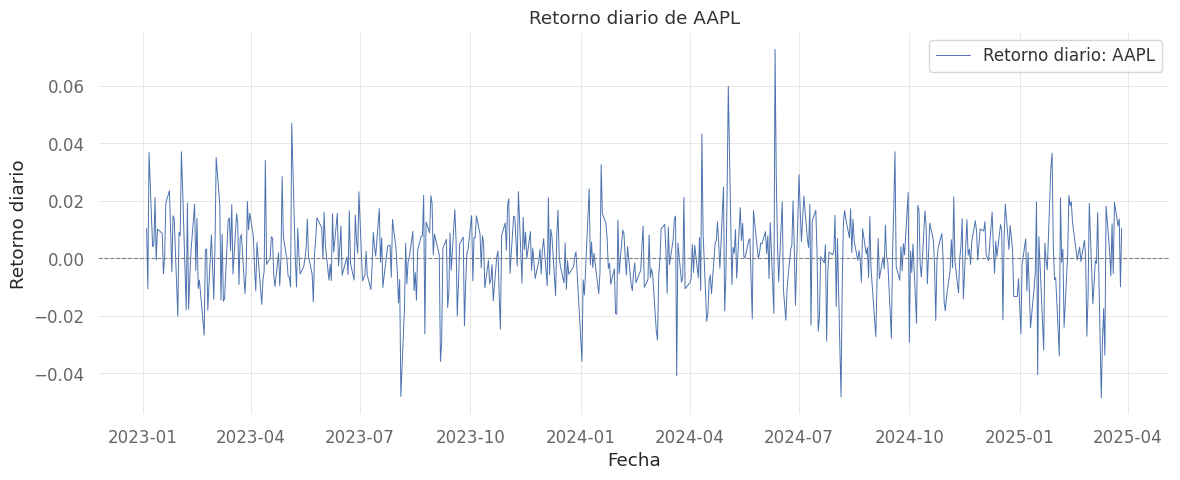

[*********************100%***********************]  1 of 1 completed


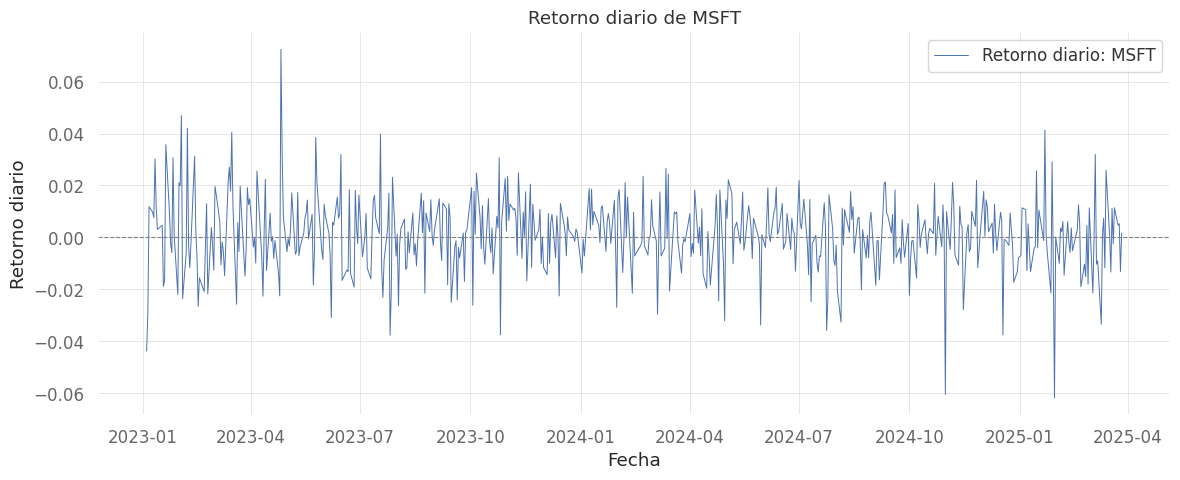

[*********************100%***********************]  1 of 1 completed


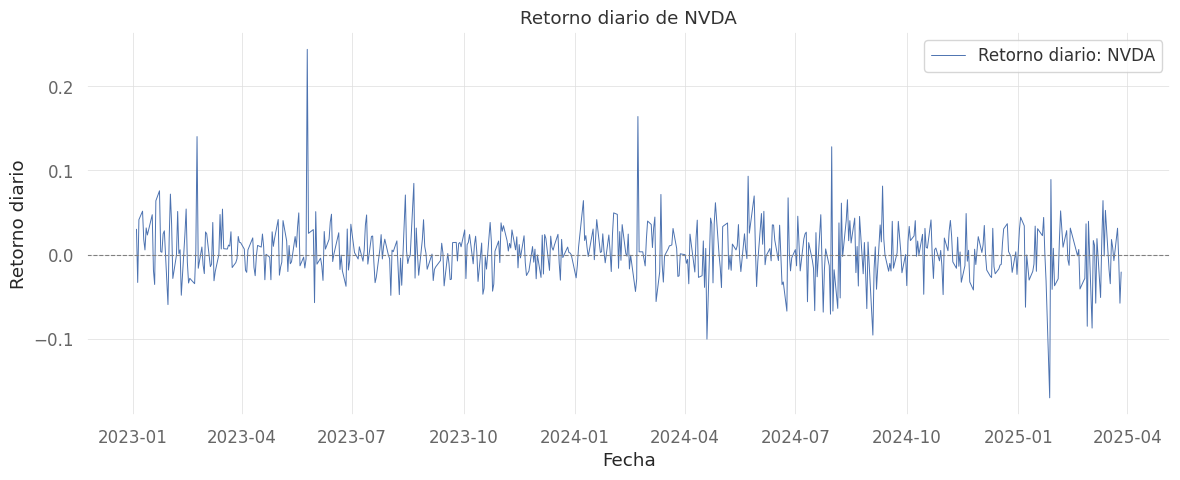

[*********************100%***********************]  1 of 1 completed


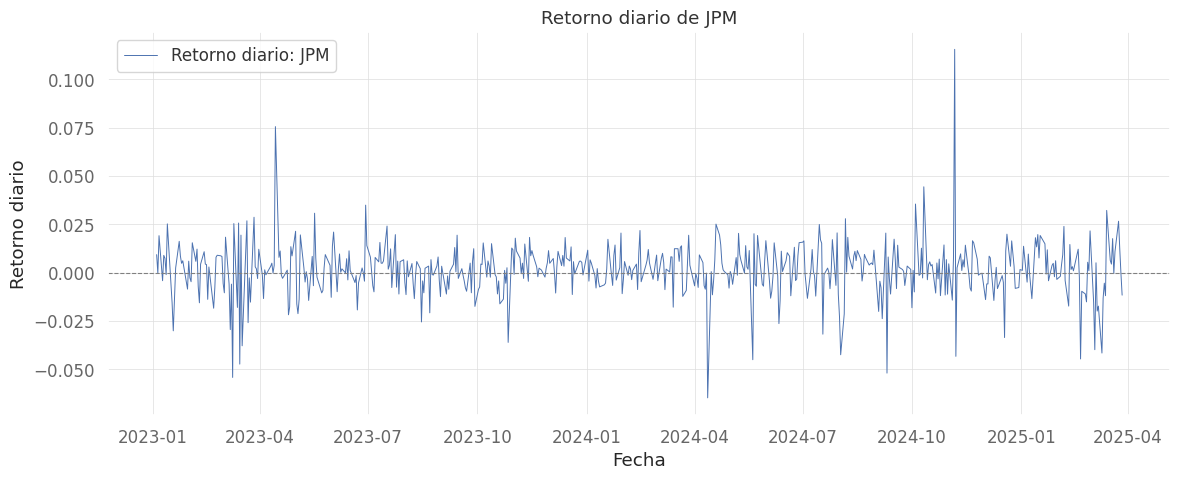

In [200]:
graficar_retorno_diario_matplotlib('AAPL')
graficar_retorno_diario_matplotlib('MSFT')
graficar_retorno_diario_matplotlib('NVDA')
graficar_retorno_diario_matplotlib('JPM')


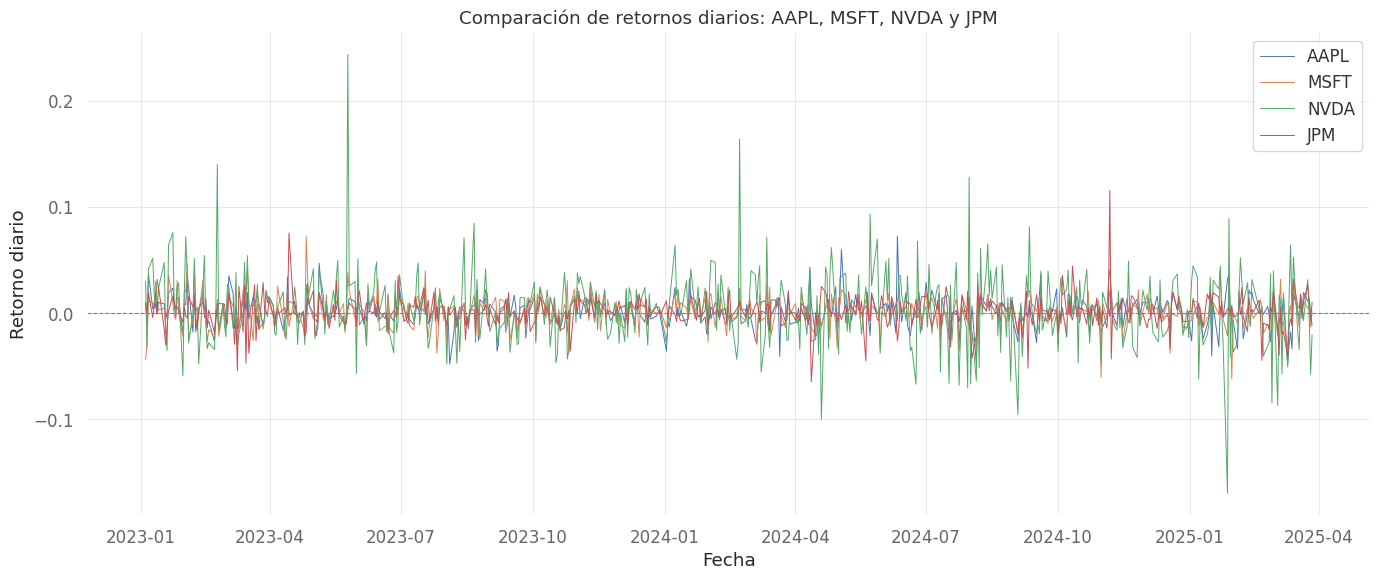

In [201]:
# Unirlos en un DataFrame para comparaci√≥n
retornos_df = pd.concat([aapl, msft, nvda, jpm], axis=1)
retornos_df.columns = ['AAPL', 'MSFT', 'NVDA', 'JPM']

# Graficar
plt.figure(figsize=(14, 6))
for columna in retornos_df.columns:
    plt.plot(retornos_df[columna], label=columna, linewidth=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Comparaci√≥n de retornos diarios: AAPL, MSFT, NVDA y JPM')
plt.xlabel('Fecha')
plt.ylabel('Retorno diario')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A simple vista es muy claro que NVDA es la serie m√°s vol√°til de las cuatro observadas, eso quiere decir que es muy riesgosa sin embargo tambi√©n podr√≠a generar buenos retornos.

## Retornos acumulados

El **retorno acumulado** de una acci√≥n representa el crecimiento total de una inversi√≥n durante un periodo determinado, teniendo en cuenta el efecto del inter√©s compuesto. Para calcularlo, se parte del precio inicial y del precio final de la acci√≥n, considerando tambi√©n los dividendos u otros ingresos si est√°n disponibles.

Este tipo de retorno es m√°s representativo que la simple suma de retornos diarios, ya que incorpora el efecto de **reinversi√≥n de las ganancias**. En otras palabras, cada ganancia obtenida se reinvierte autom√°ticamente, generando nuevas ganancias sobre los rendimientos anteriores.

Matem√°ticamente, el retorno acumulado se puede obtener a partir de los retornos diarios usando la siguiente f√≥rmula compuesta:

$$
\text{Retorno acumulado} = \prod_{t=1}^{T} (1 + r_t) - 1
$$

donde \( r_t \) representa el retorno diario en el d√≠a \( t \). El resultado se expresa como proporci√≥n o como porcentaje si se multiplica por 100.

A continuaci√≥n se presenta un gr√°fico comparativo de los retornos acumulados de cuatro acciones: Apple (AAPL), Microsoft (MSFT), Nvidia (NVDA) y JPMorgan (JPM), desde enero de 2023 hasta marzo de 2025.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


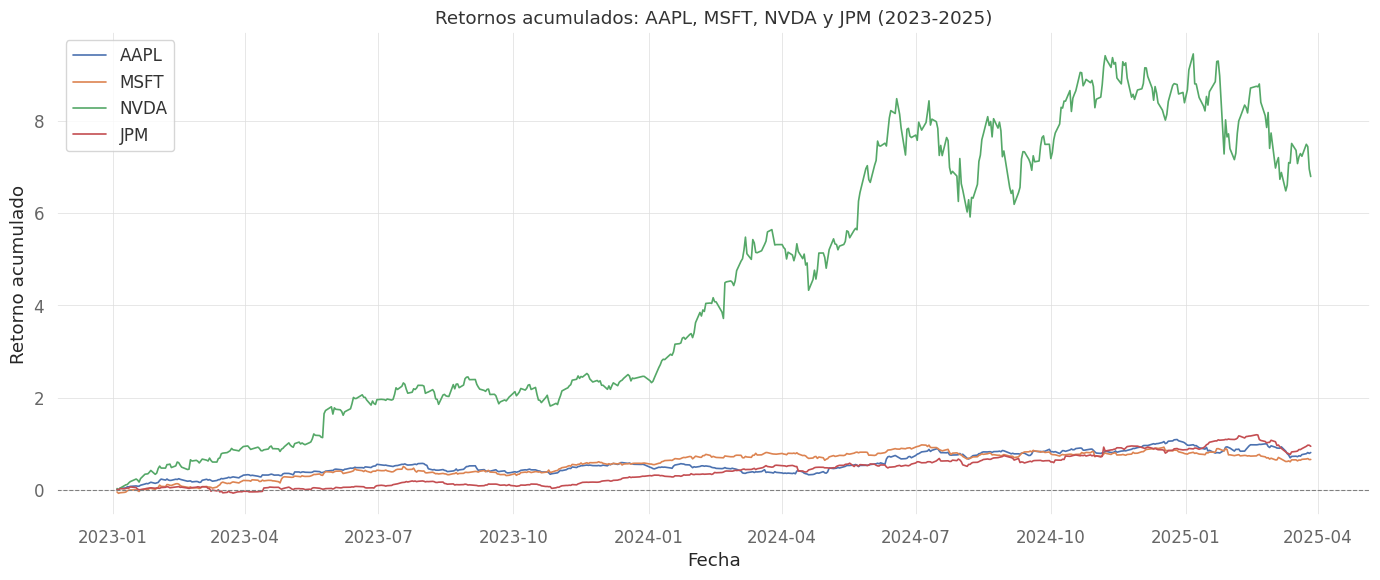

In [202]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Funci√≥n para obtener retornos diarios
def obtener_retorno_diario(ticker, start='2023-01-03', end='2025-03-28'):
    df = yf.download(ticker, start=start, end=end, auto_adjust=False)
    returns = df['Adj Close'].pct_change().dropna()
    returns.index = pd.to_datetime(returns.index)
    return returns

# Descargar y calcular retornos diarios
aapl = obtener_retorno_diario('AAPL')
msft = obtener_retorno_diario('MSFT')
nvda = obtener_retorno_diario('NVDA')
jpm = obtener_retorno_diario('JPM')

# Combinar retornos en un solo DataFrame
retornos = pd.concat([aapl, msft, nvda, jpm], axis=1)
retornos.columns = ['AAPL', 'MSFT', 'NVDA', 'JPM']

# Calcular retornos acumulados
retornos_acumulados = (1 + retornos).cumprod() - 1

# Graficar
plt.figure(figsize=(14, 6))
for columna in retornos_acumulados.columns:
    plt.plot(retornos_acumulados[columna], label=columna, linewidth=1.2)

plt.title('Retornos acumulados: AAPL, MSFT, NVDA y JPM (2023-2025)')
plt.xlabel('Fecha')
plt.ylabel('Retorno acumulado')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Observasiones de los retornos acumulados (2023‚Äì2025)

El gr√°fico de retornos acumulados revela diferencias notables entre las cuatro acciones analizadas. Desde una perspectiva cuantitativa o de trading, estas observaciones son clave para interpretar riesgos, oportunidades y comportamiento del mercado:

### Nvidia (NVDA): rendimiento explosivo y perfil de alto crecimiento

Nvidia muestra un rendimiento acumulado claramente superior, multiplicando su valor inicial por m√°s de 8 veces en el periodo observado. Esta trayectoria sugiere una fuerte tendencia alcista impulsada por la narrativa de la inteligencia artificial, su liderazgo en semiconductores y posiblemente resultados financieros sobresalientes.

Desde un enfoque **quant**, este tipo de comportamiento es t√≠pico de activos que podr√≠an aprovecharse mediante estrategias de **momentum o trend-following**, pero tambi√©n implica **mayor volatilidad y riesgo**. El uso de t√©cnicas de control de riesgo como **stops din√°micos, drawdowns o modelos GARCH** ser√≠a recomendable al operar con NVDA.

### Apple (AAPL) y Microsoft (MSFT): crecimiento estable y correlacionado

Ambas compa√±√≠as muestran un crecimiento acumulado moderado, con trayectorias bastante similares. Este comportamiento es caracter√≠stico de **acciones defensivas dentro del sector tecnol√≥gico**, utilizadas frecuentemente para diversificar carteras. Su volatilidad es menor en comparaci√≥n con NVDA, lo cual las hace atractivas para estrategias de **inversi√≥n a largo plazo** o **portafolios balanceados**.

### JPMorgan (JPM): comportamiento predecible y menor rendimiento

JPM presenta el menor rendimiento acumulado entre los cuatro activos, lo cual es coherente con su naturaleza como banco tradicional. Aunque menos rentable, su curva es m√°s estable, lo que puede resultar √∫til en escenarios de alta incertidumbre o como **activo contrac√≠clico** dentro de una estrategia de cobertura.

---

### Conclusi√≥n

Este tipo de an√°lisis visual y cuantitativo es fundamental para identificar oportunidades y tomar decisiones informadas. En este caso, **NVDA destaca por su agresivo crecimiento**, mientras que **AAPL y MSFT act√∫an como pilares de estabilidad**. JPM, por su parte, aporta **previsibilidad en contextos de diversificaci√≥n sectorial**.

Este contraste ofrece m√∫ltiples posibilidades para dise√±ar **estrategias de trading, optimizaci√≥n de portafolios o an√°lisis de riesgo**, seg√∫n el perfil y objetivo del inversionista.


## Histogramas de retornos diarios

Los **histogramas** son herramientas visuales que permiten observar la distribuci√≥n de los valores en un conjunto de datos. En el contexto financiero, son particularmente √∫tiles para analizar la **distribuci√≥n de los retornos diarios** de una acci√≥n.

Al graficar histogramas de retornos, podemos identificar:

- **Rango de variaci√≥n** de los retornos diarios.
- **Asimetr√≠a** o sesgo (si los retornos son m√°s frecuentes hacia el lado positivo o negativo).
- **Kurtosis** (colas pesadas o concentraci√≥n cerca de la media).
- Nivel general de **volatilidad**.

En este an√°lisis, se presentan los histogramas de los retornos diarios de Apple (AAPL), Microsoft (MSFT), Nvidia (NVDA) y JPMorgan (JPM) entre enero de 2023 y marzo de 2025. Estos gr√°ficos permiten comparar la **estabilidad** y **comportamiento estad√≠stico** de cada acci√≥n.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


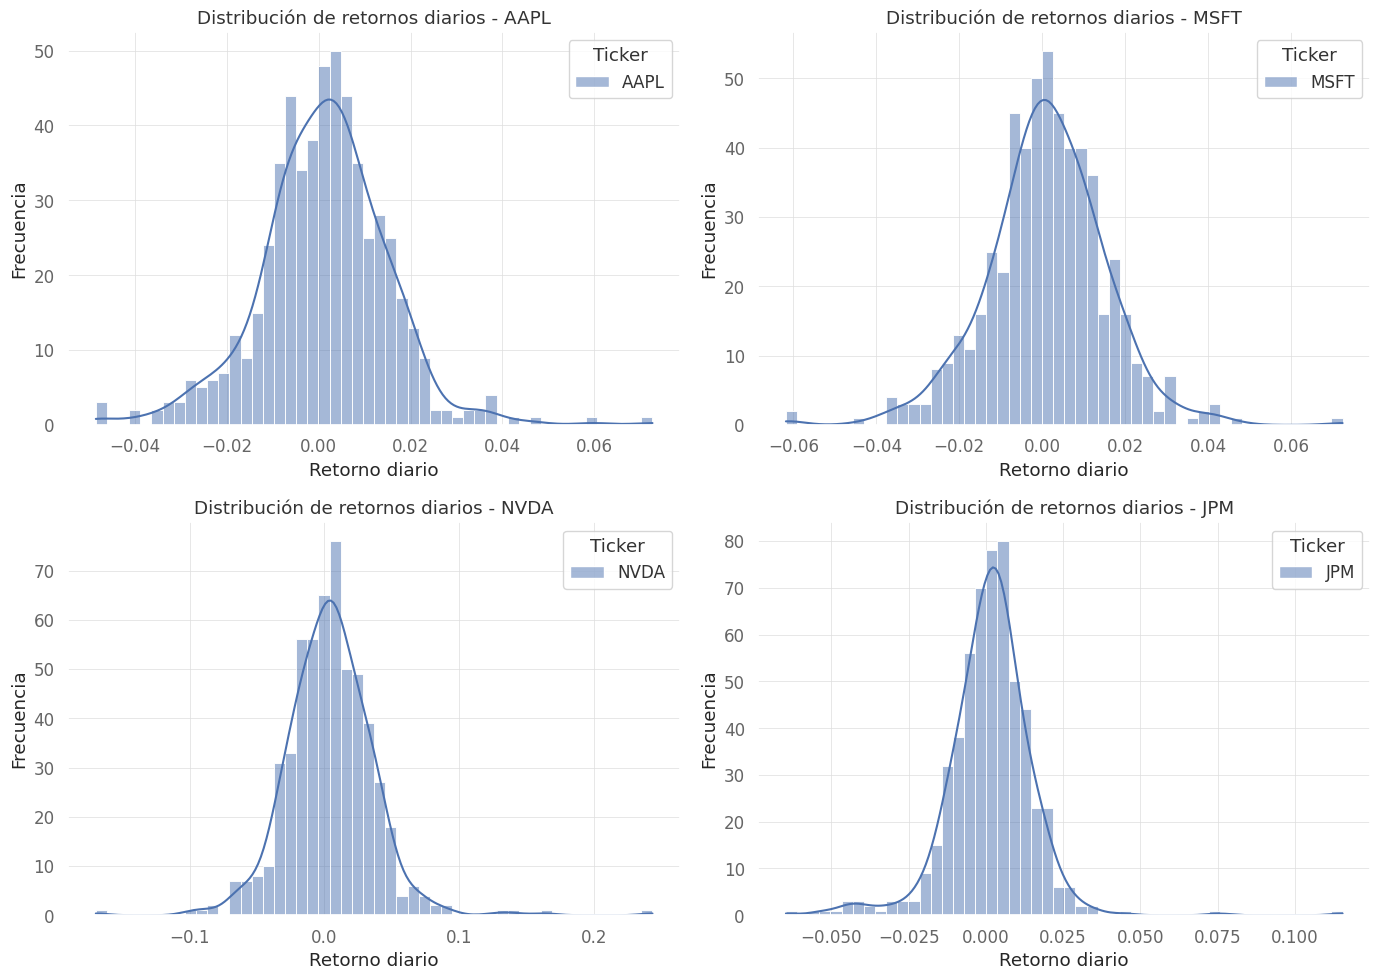

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd

# Funci√≥n para obtener retornos diarios
def obtener_retorno_diario(ticker, start='2023-01-03', end='2025-03-28'):
    df = yf.download(ticker, start=start, end=end, auto_adjust=False)
    returns = df['Adj Close'].pct_change().dropna()
    returns.index = pd.to_datetime(returns.index)
    return returns

# Descargar retornos
aapl = obtener_retorno_diario('AAPL')
msft = obtener_retorno_diario('MSFT')
nvda = obtener_retorno_diario('NVDA')
jpm  = obtener_retorno_diario('JPM')

# Crear figura con subplots
plt.figure(figsize=(14, 10))

# Histograma AAPL
plt.subplot(2, 2, 1)
sns.histplot(aapl, bins=50, kde=True, color='steelblue')
plt.title('Distribuci√≥n de retornos diarios - AAPL')
plt.xlabel('Retorno diario')
plt.ylabel('Frecuencia')
plt.grid(True)

# Histograma MSFT
plt.subplot(2, 2, 2)
sns.histplot(msft, bins=50, kde=True, color='orange')
plt.title('Distribuci√≥n de retornos diarios - MSFT')
plt.xlabel('Retorno diario')
plt.ylabel('Frecuencia')
plt.grid(True)

# Histograma NVDA
plt.subplot(2, 2, 3)
sns.histplot(nvda, bins=50, kde=True, color='green')
plt.title('Distribuci√≥n de retornos diarios - NVDA')
plt.xlabel('Retorno diario')
plt.ylabel('Frecuencia')
plt.grid(True)

# Histograma JPM
plt.subplot(2, 2, 4)
sns.histplot(jpm, bins=50, kde=True, color='red')
plt.title('Distribuci√≥n de retornos diarios - JPM')
plt.xlabel('Retorno diario')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()


## An√°lisis de histogramas: distribuci√≥n y riesgo extremo

Los histogramas de retornos diarios permiten observar la forma en que se distribuyen las ganancias y p√©rdidas de una acci√≥n a lo largo del tiempo. En este an√°lisis, se destacan algunas caracter√≠sticas clave que tienen implicaciones importantes para el manejo de riesgo y la estrategia de inversi√≥n.

### NVDA: colas pesadas y eventos extremos

El histograma de **Nvidia (NVDA)** revela una distribuci√≥n con **colas m√°s largas** que las de las otras acciones, lo cual indica la presencia de **eventos extremos o retornos inusualmente grandes**, tanto positivos como negativos.

Desde una perspectiva cuantitativa, este fen√≥meno se asocia con:

- **Colas pesadas (fat tails)**: mayor probabilidad de movimientos extremos en comparaci√≥n con una distribuci√≥n normal.
- **Asimetr√≠a leve hacia la derecha**, indicando que los eventos de ganancias muy altas han sido m√°s frecuentes que las p√©rdidas extremas.
- **Alta curtosis**, lo que significa que los valores tienden a concentrarse fuertemente cerca de la media, pero con una mayor frecuencia de desviaciones extremas en los extremos.

Este patr√≥n es t√≠pico de activos con alta sensibilidad a noticias tecnol√≥gicas, lanzamientos disruptivos o ciclos de hype, y puede ser reflejo del **efecto Black Swan**: eventos impredecibles con gran impacto, como una aceleraci√≥n en la demanda de chips para inteligencia artificial o, por el contrario, un desplome repentino por exceso de valoraci√≥n.

### JPM, AAPL y MSFT: distribuci√≥n m√°s normal

En contraste, **JPM**, **AAPL** y **MSFT** muestran distribuciones que se asemejan m√°s a una **curva normal (gaussiana)**, lo que indica un comportamiento m√°s **estable y predecible**. Las colas son m√°s delgadas, y no hay tantos outliers extremos como en el caso de NVDA. Esto los convierte en activos m√°s adecuados para estrategias conservadoras o modelos estad√≠sticos tradicionales como la **VaR normal**.

---

### Conclusi√≥n

Este an√°lisis visual de la distribuci√≥n nos permite entender que **no todos los activos se comportan igual**, y que aplicar el mismo modelo de riesgo a todos puede ser inapropiado. En activos como NVDA, donde los retornos extremos son frecuentes, es necesario usar herramientas m√°s robustas, como:

- **Modelos no param√©tricos de riesgo**
- **Stress testing**
- **Simulaciones de Monte Carlo**
- **An√°lisis bajo distribuciones de colas pesadas (t-student, Pareto, etc.)**

Incluir estos elementos mejora la capacidad de anticipar eventos raros pero devastadores ‚Äî los llamados **cisnes negros** ‚Äî y construir portafolios realmente resistentes.


## An√°lisis de curtosis en los retornos diarios

La **kurtosis** es una medida estad√≠stica que describe la forma de la distribuci√≥n de un conjunto de datos, en particular la **concentraci√≥n y extremidad** de los valores en relaci√≥n con la media.

En finanzas, la kurtosis es √∫til para entender el comportamiento de los retornos de un activo, especialmente en lo que respecta a la **presencia de eventos extremos** o "colas pesadas".

Existen tres tipos de kurtosis:

1. **Mesoc√∫rtica**: kurtosis ‚âà 3 ‚Üí distribuci√≥n normal (sim√©trica, colas moderadas)
2. **Leptoc√∫rtica**: kurtosis > 3 ‚Üí colas m√°s pesadas que una normal (m√°s outliers). Indica mayor riesgo de eventos extremos.
3. **Platic√∫rtica**: kurtosis < 3 ‚Üí colas m√°s delgadas. Menos eventos extremos, distribuci√≥n m√°s aplanada.

Una kurtosis alta es especialmente relevante en el an√°lisis financiero, ya que sugiere que los modelos basados en distribuciones normales pueden subestimar el riesgo de grandes p√©rdidas o ganancias (fen√≥meno de los "Black Swans").

A continuaci√≥n, calculamos la kurtosis de los retornos diarios de AAPL, MSFT, NVDA y JPM.


In [205]:
from scipy.stats import kurtosis
import pandas as pd

# Aseg√∫rate de tener los retornos ya calculados como series:
# aapl, msft, nvda, jpm

# Calcular kurtosis (Fisher=False da la definici√≥n cl√°sica, donde normal = 3)
kurtosis_resultados = pd.DataFrame({
    'Kurtosis': [
        kurtosis(aapl, fisher=False),
        kurtosis(msft, fisher=False),
        kurtosis(nvda, fisher=False),
        kurtosis(jpm, fisher=False)
    ]
}, index=['AAPL', 'MSFT', 'NVDA', 'JPM'])

# Mostrar tabla ordenada
print("Kurtosis de los retornos diarios (2023‚Äì2025):\n")
print(kurtosis_resultados.sort_values('Kurtosis', ascending=False))


Kurtosis de los retornos diarios (2023‚Äì2025):

                  Kurtosis
JPM   [13.476545918645426]
NVDA  [10.175644512090113]
AAPL   [5.355255878464787]
MSFT   [5.148077821937618]


## An√°lisis de kurtosis: evidencia de colas pesadas y riesgo extremo

Los valores obtenidos para la kurtosis de los retornos diarios en el periodo 2023‚Äì2025 son los siguientes:

| Activo | Kurtosis |
|--------|----------|
| JPM    | 13.48    |
| NVDA   | 10.18    |
| AAPL   | 5.36     |
| MSFT   | 5.15     |

Estos resultados muestran que **todas las distribuciones tienen una kurtosis mayor a 3**, lo que indica que presentan **colas m√°s pesadas que una distribuci√≥n normal**. Es decir, tienen mayor frecuencia de **eventos extremos** (ganancias o p√©rdidas inusuales).

### JPMorgan (JPM): la m√°s leptoc√∫rtica

Con un valor de **13.48**, JPM muestra una concentraci√≥n fuerte de retornos en torno a la media, pero tambi√©n una mayor probabilidad de movimientos extremos. Este comportamiento puede estar influido por eventos espec√≠ficos del sector financiero o por su exposici√≥n a shocks macroecon√≥micos. A pesar de su bajo retorno acumulado, **su perfil de riesgo extremo es alto**, lo cual podr√≠a pasar desapercibido si uno solo observa la volatilidad o media.

### Nvidia (NVDA): riesgo extremo confirmado

NVDA, con una **kurtosis de 10.18**, refuerza lo observado en el histograma: presencia frecuente de retornos an√≥malos. Esto es caracter√≠stico de activos con fuerte momentum, expuestos a innovaci√≥n, especulaci√≥n o ciclos tecnol√≥gicos.

### AAPL y MSFT: valores altos pero m√°s contenidos

Ambos activos presentan kurtosis en el rango de **5.1 a 5.3**, lo que sigue siendo elevado, pero no tanto como NVDA o JPM. Esto confirma que, si bien son relativamente estables, tambi√©n pueden experimentar movimientos fuera de lo esperado por una distribuci√≥n normal. Esto justifica utilizar m√©tricas de riesgo m√°s all√° de la varianza para estos activos tambi√©n.

---

### Conclusi√≥n

Estos resultados evidencian que incluso en empresas consideradas ‚Äúestables‚Äù, el riesgo de eventos extremos est√° presente. Modelos financieros que asumen normalidad (como VaR param√©trico cl√°sico) podr√≠an **subestimar el riesgo real**, especialmente para JPM y NVDA. En este contexto, se recomienda utilizar herramientas robustas como:

- VaR hist√≥rico o Monte Carlo.
- Modelos con distribuciones de colas pesadas (t-student, EVT).
- Medidas de riesgo condicional como el **CVaR (Conditional Value at Risk)**.

La kurtosis es una herramienta clave para entender el **riesgo no aparente**, y deber√≠a formar parte de cualquier an√°lisis de portafolio riguroso.


## Skewness (Asimetr√≠a) en los retornos diarios

La **skewness**, o asimetr√≠a, es una medida estad√≠stica que describe el grado de **simetr√≠a** de una distribuci√≥n de datos respecto a su media. En el an√°lisis financiero, permite identificar si los retornos de un activo tienden a tener m√°s eventos **positivos** o **negativos**.

Los tipos de skewness son:

- **Skewness positiva (> 0)**: la cola derecha es m√°s larga. Hay m√°s valores extremos positivos. Es favorable para los inversionistas, ya que indica posibilidad de grandes ganancias.
- **Skewness negativa (< 0)**: la cola izquierda es m√°s larga. Mayor probabilidad de eventos negativos extremos, como ca√≠das abruptas.
- **Skewness cercana a 0**: distribuci√≥n sim√©trica, donde las ganancias y p√©rdidas extremas ocurren con igual probabilidad.

En mercados financieros, muchas veces las distribuciones de retornos presentan **skewness negativa**, lo que representa un riesgo oculto: las grandes p√©rdidas son m√°s frecuentes que lo que una distribuci√≥n normal predice.

A continuaci√≥n, calculamos la skewness de los retornos diarios de las acciones AAPL, MSFT, NVDA y JPM, para evaluar este comportamiento.


In [206]:
from scipy.stats import skew
import pandas as pd

# Calcular skewness para cada serie de retornos
skewness_resultados = pd.DataFrame({
    'Skewness': [
        skew(aapl),
        skew(msft),
        skew(nvda),
        skew(jpm)
    ]
}, index=['AAPL', 'MSFT', 'NVDA', 'JPM'])

# Mostrar ordenado
print("Skewness de los retornos diarios (2023‚Äì2025):\n")
print(skewness_resultados.sort_values('Skewness', ascending=False))


Skewness de los retornos diarios (2023‚Äì2025):

                    Skewness
NVDA    [0.6938329674865561]
JPM    [0.45224374489628827]
AAPL   [0.06784102602953339]
MSFT  [-0.08840073359713797]


## An√°lisis de asimetr√≠a (skewness) en los retornos diarios

Los valores calculados de **skewness** para los retornos diarios de enero de 2023 a marzo de 2025 son los siguientes:

| Activo | Skewness |
|--------|----------|
| NVDA   |  0.69    |
| JPM    |  0.45    |
| AAPL   |  0.07    |
| MSFT   | -0.09    |

Estos resultados nos permiten interpretar la **asimetr√≠a de los retornos** y anticipar posibles riesgos o comportamientos extremos.

### NVDA y JPM: sesgo positivo

Nvidia (0.69) y JPMorgan (0.45) presentan **skewness positiva significativa**, lo que indica que han tenido una mayor frecuencia de **retornos positivos extremos** que negativos. Esto es coherente con el alto rendimiento acumulado de NVDA, donde grandes subidas han sido comunes durante el periodo. En el caso de JPM, este sesgo puede deberse a reacciones positivas a noticias macroecon√≥micas o resultados financieros puntuales.

Un skew positivo es generalmente favorable para los inversionistas, ya que sugiere que, aunque hay riesgo, hay m√°s probabilidad de ‚Äúsorpresas positivas‚Äù que de p√©rdidas fuertes.

### AAPL y MSFT: distribuciones casi sim√©tricas

Apple (0.07) y Microsoft (-0.09) tienen skewness muy cercanas a cero, lo que implica que sus distribuciones son **casi sim√©tricas**. Esto indica un comportamiento m√°s balanceado entre ganancias y p√©rdidas extremas. En estos casos, el riesgo puede modelarse m√°s adecuadamente con herramientas tradicionales basadas en distribuci√≥n normal, aunque siempre es recomendable validar la kurtosis.

El caso de Microsoft es ligeramente **negativo**, lo que implica una leve mayor probabilidad de ca√≠das abruptas que de alzas grandes. Aunque el valor es bajo, podr√≠a ser un punto de atenci√≥n si se combina con alta volatilidad o deterioro en fundamentales.

---

### Conclusi√≥n

La skewness aporta una capa adicional de interpretaci√≥n al an√°lisis de retornos:

- **NVDA y JPM** tienen un perfil de riesgo/recompensa **asim√©trico a favor del inversionista**, lo que puede ser atractivo en estrategias de momentum o acumulaci√≥n.
- **MSFT y AAPL**, al mostrar simetr√≠a, ofrecen estabilidad y menor incertidumbre respecto a los extremos, lo cual los hace ideales para portafolios de bajo riesgo o como activos base para coberturas.

Combinado con la **kurtosis**, este an√°lisis permite entender tanto la **frecuencia como la direcci√≥n de los eventos extremos**, algo esencial en modelos de gesti√≥n de riesgo realista y robusta.


## Desviaci√≥n est√°ndar (Volatilidad) de los retornos diarios

La **desviaci√≥n est√°ndar** es una m√©trica estad√≠stica fundamental que cuantifica la **variabilidad** de un conjunto de datos. En el contexto financiero, se interpreta como una medida de **volatilidad**, es decir, el grado de fluctuaci√≥n que presentan los retornos diarios de un activo.

Una desviaci√≥n est√°ndar alta indica que los retornos del activo var√≠an considerablemente en torno a su media, lo que implica mayor **incertidumbre o riesgo**. Por el contrario, una desviaci√≥n est√°ndar baja sugiere que los retornos se mantienen m√°s estables y predecibles.

La f√≥rmula general para la desviaci√≥n est√°ndar es:

$$
\sigma = \sqrt{ \frac{1}{N - 1} \sum_{i=1}^{N} (x_i - \bar{x})^2 }
$$

Donde:

- \( x_i \) representa cada uno de los retornos observados.
- \( \bar{x} \) es la media de los retornos.
- \( N \) es el n√∫mero total de observaciones.

### Interpretaci√≥n en el an√°lisis financiero

- Activos con **alta desviaci√≥n est√°ndar** son considerados m√°s vol√°tiles y, por tanto, **m√°s riesgosos**.
- Comparar la desviaci√≥n est√°ndar entre acciones permite evaluar su estabilidad relativa, especialmente cuando tienen rendimientos promedio similares.

A continuaci√≥n, se calcula la desviaci√≥n est√°ndar de los retornos diarios de AAPL, MSFT, NVDA y JPM durante el periodo 2023‚Äì2025.


In [207]:
import pandas as pd

# Calcular desviaci√≥n est√°ndar asegurando valores escalares con .item()
volatilidad_resultados = pd.DataFrame({
    'Volatilidad (std)': [
        aapl.std().item(),
        msft.std().item(),
        nvda.std().item(),
        jpm.std().item()
    ]
}, index=['AAPL', 'MSFT', 'NVDA', 'JPM'])

# Mostrar ordenado
print("Volatilidad de los retornos diarios (2023‚Äì2025):\n")
print(volatilidad_resultados.sort_values('Volatilidad (std)', ascending=False))


Volatilidad de los retornos diarios (2023‚Äì2025):

      Volatilidad (std)
NVDA           0.033131
MSFT           0.014473
JPM            0.014115
AAPL           0.014012


In [208]:
# Si queremos la volatilidad anualizada
#volatilidad_anual = retornos.std() * np.sqrt(252)


## An√°lisis de la volatilidad diaria de los retornos (2023‚Äì2025)

A continuaci√≥n se presentan los valores calculados de **desviaci√≥n est√°ndar** (volatilidad) para los retornos diarios de las cuatro acciones analizadas:

| Activo | Volatilidad diaria |
|--------|--------------------|
| NVDA   | 0.0331             |
| MSFT   | 0.0145             |
| JPM    | 0.0141             |
| AAPL   | 0.0140             |

### Nvidia (NVDA): la m√°s vol√°til con diferencia

Nvidia presenta una **volatilidad diaria m√°s del doble** que el resto de las acciones. Esto refuerza los hallazgos previos: NVDA es un activo con **alto potencial de rendimiento**, pero tambi√©n con **alto riesgo**, al estar expuesto a mayores fluctuaciones diarias.

Este nivel de volatilidad puede estar asociado a:

- Noticias o expectativas relacionadas con inteligencia artificial.
- Sensibilidad a cambios en tasas, demanda de semiconductores, o disrupciones tecnol√≥gicas.
- Inversi√≥n especulativa y presencia en portafolios de momentum.

En este contexto, NVDA es ideal para inversionistas tolerantes al riesgo o para estrategias activas con control din√°mico de posici√≥n.

### AAPL, MSFT y JPM: estabilidad destacable

Apple, Microsoft y JPMorgan presentan una **volatilidad diaria muy similar y baja**, alrededor del 1.4%. Esta estabilidad los convierte en **activos defensivos o n√∫cleo de portafolios balanceados**, adecuados para:

- Inversores conservadores.
- Estrategias de cobertura o anclaje.
- Construcci√≥n de portafolios de m√≠nima varianza.

Aunque sus rendimientos acumulados son distintos, su comportamiento en cuanto a fluctuaciones diarias es notablemente controlado.

---

### Conclusi√≥n

Este an√°lisis confirma que **NVDA es el activo m√°s riesgoso en t√©rminos de volatilidad**, mientras que **AAPL, MSFT y JPM ofrecen mayor previsibilidad**. En el dise√±o de un portafolio, estas m√©tricas permiten ajustar pesos, aplicar restricciones de riesgo o definir mecanismos de rebalanceo.

La volatilidad es una medida clave en la toma de decisiones de inversi√≥n, especialmente cuando se combina con m√©tricas como el **retorno esperado, skewness y kurtosis**, para tener una visi√≥n integral del perfil riesgo-retorno de cada activo.


## An√°lisis de correlaci√≥n: Pairplots y matriz de correlaci√≥n

El an√°lisis de **correlaci√≥n** es una herramienta fundamental en la construcci√≥n y gesti√≥n de portafolios. Permite conocer el grado en que los activos se mueven juntos, lo cual es clave tanto para dise√±ar estrategias de cobertura (*hedge*) como para evitar concentraciones de riesgo innecesarias.

En nuestro caso, analizamos los retornos diarios de Apple (AAPL), Microsoft (MSFT), Nvidia (NVDA) y JPMorgan (JPM) en el periodo 2023‚Äì2025. Visualizaremos:

1. Un **pairplot**: gr√°fico que muestra relaciones bivariadas entre todos los pares de activos.
2. Una **matriz de correlaci√≥n**: para cuantificar la relaci√≥n lineal entre los activos, con valores que van de -1 (correlaci√≥n negativa perfecta) a 1 (positiva perfecta).

### ¬øPor qu√© es importante?

- Si todos los activos est√°n altamente correlacionados, los beneficios de diversificaci√≥n son limitados.
- En cambio, correlaciones bajas o negativas permiten **reducir la volatilidad del portafolio total**.
- Este an√°lisis tambi√©n es √∫til para estrategias **long-short**, donde se busca que dos activos tengan correlaci√≥n negativa.

A continuaci√≥n, generamos las visualizaciones y examinamos si estos activos aportan diversificaci√≥n real al portafolio.


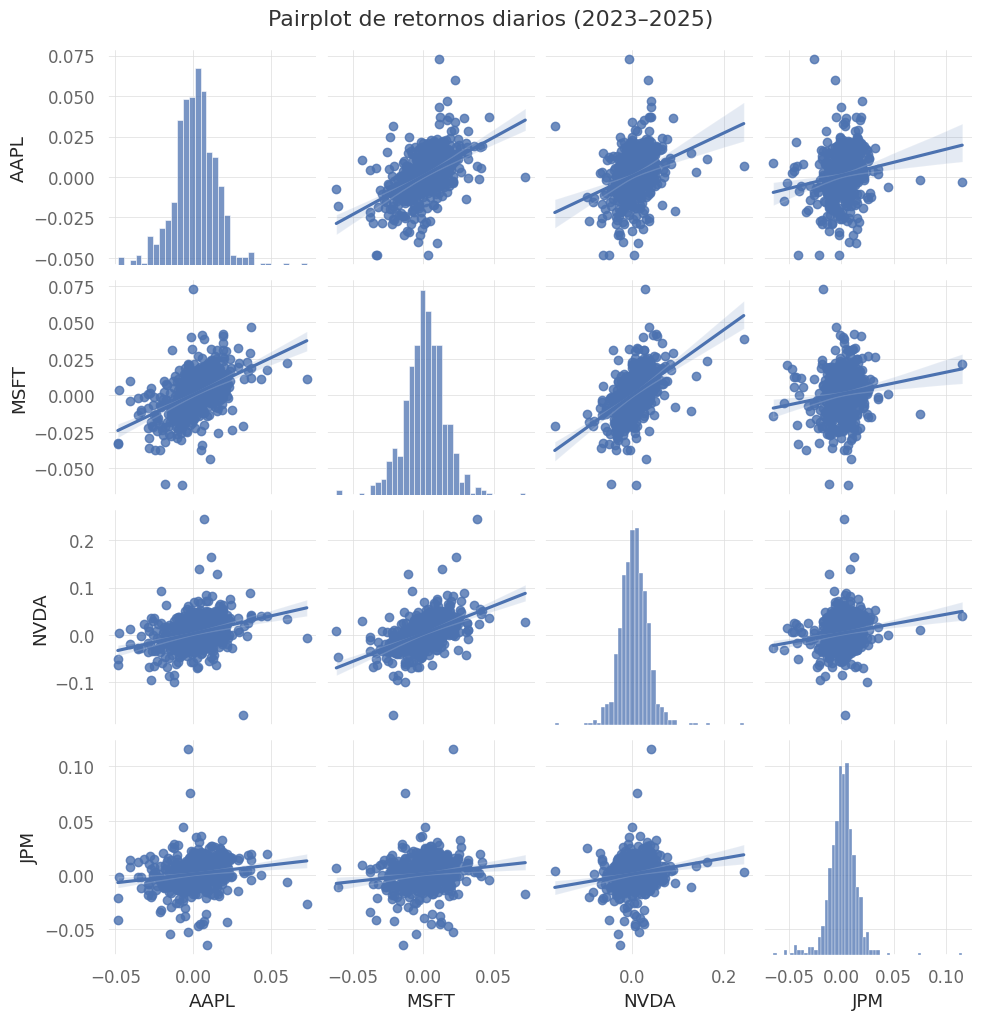

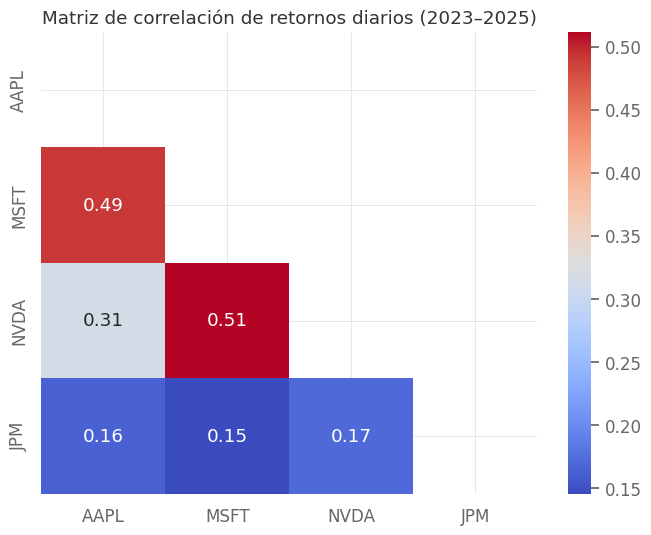

In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Unir los retornos diarios en un √∫nico DataFrame
merged_df = pd.concat([aapl, msft, nvda, jpm], axis=1)
merged_df.columns = ['AAPL', 'MSFT', 'NVDA', 'JPM']
merged_df.dropna(inplace=True)  # eliminar filas con valores faltantes

# Pairplot: relaciones bivariadas entre activos
sns.pairplot(merged_df, kind='reg')
plt.suptitle('Pairplot de retornos diarios (2023‚Äì2025)', y=1.02)
plt.show()

# Matriz de correlaci√≥n
corr = merged_df.corr()

# Crear m√°scara para la diagonal inferior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Matriz de correlaci√≥n de retornos diarios (2023‚Äì2025)')
plt.show()


## An√°lisis de correlaci√≥n entre los activos (2023‚Äì2025)

La matriz de correlaci√≥n muestra el grado de relaci√≥n lineal entre los retornos diarios de las acciones AAPL, MSFT, NVDA y JPM. Los valores se interpretan as√≠:

- **+1.0**: correlaci√≥n perfectamente positiva (se mueven exactamente igual).
- **0.0**: sin correlaci√≥n (movimientos independientes).
- **-1.0**: correlaci√≥n perfectamente negativa (uno sube, el otro baja).

### Principales hallazgos

| Par de activos     | Correlaci√≥n | Interpretaci√≥n                                      |
|--------------------|-------------|-----------------------------------------------------|
| MSFT ‚Äì NVDA        | 0.51        | Correlaci√≥n moderada positiva. Se mueven algo juntos. |
| AAPL ‚Äì MSFT        | 0.49        | Alta correlaci√≥n dentro del sector tecnol√≥gico.     |
| AAPL ‚Äì NVDA        | 0.31        | Correlaci√≥n baja-moderada, pero todav√≠a significativa. |
| JPM ‚Äì NVDA/MSFT/AAPL | 0.15‚Äì0.17 | Correlaci√≥n muy baja. Aporta diversificaci√≥n real.   |

### Interpretaci√≥n general

- **MSFT y NVDA** son las m√°s correlacionadas, lo cual es esperado al compartir sector (tecnolog√≠a) y exposici√≥n a tendencias similares como inteligencia artificial o digitalizaci√≥n.
- **AAPL y MSFT** tambi√©n est√°n altamente correlacionadas, lo cual implica que invertir en ambas **no proporciona una diversificaci√≥n significativa**.
- **JPMorgan (JPM)** es el activo **menos correlacionado** con el resto, lo que lo convierte en una **pieza clave para la diversificaci√≥n**. Su baja correlaci√≥n puede amortiguar movimientos del mercado tecnol√≥gico, funcionando como una especie de ‚Äúhedge sectorial‚Äù.

---

### Recomendaci√≥n

Si el objetivo del portafolio es lograr una buena relaci√≥n **riesgo-retorno**, ser√≠a ideal:

- Combinar activos con correlaci√≥n baja (como JPM + NVDA).
- Evitar sobreponderar activos muy correlacionados (como MSFT y AAPL) sin una justificaci√≥n clara.
- Considerar activos con correlaci√≥n negativa (no presentes aqu√≠) como bonos o commodities para protegerse en escenarios de alta volatilidad.

El an√°lisis de correlaci√≥n es un paso esencial para construir portafolios **resilientes ante choques de mercado** y evitar exposiciones redundantes.


## Beta y Alpha: Medidas de Riesgo y Desempe√±o Ajustado al Mercado

Las m√©tricas **Beta** y **Alpha** son fundamentales en finanzas para evaluar el comportamiento de un activo en comparaci√≥n con el mercado general:

### üìä Beta

El **Beta** mide la **sensibilidad del rendimiento de una acci√≥n frente al mercado**. Se interpreta as√≠:

- **Beta = 1**: La acci√≥n se mueve igual que el mercado.
- **Beta > 1**: La acci√≥n es m√°s vol√°til que el mercado (m√°s arriesgada).
- **Beta < 1**: La acci√≥n es menos vol√°til (m√°s defensiva).

Por ejemplo, un Beta de 1.3 indica que, en promedio, el activo se mueve un 30% m√°s que el mercado ante los mismos cambios.

### üßÆ Alpha

El **Alpha** mide el rendimiento adicional de una acci√≥n con respecto a su rendimiento esperado seg√∫n su Beta. Es una se√±al de **desempe√±o ajustado por riesgo**:

- **Alpha > 0**: La acci√≥n **super√≥** lo que se esperaba por su riesgo.
- **Alpha < 0**: La acci√≥n **qued√≥ por debajo** del rendimiento ajustado por riesgo.
- **Alpha ‚âà 0**: El activo rindi√≥ como se esperaba seg√∫n su Beta.

Estas m√©tricas se obtienen aplicando una **regresi√≥n lineal** de los retornos del activo sobre los retornos del mercado (en este caso, el S&P 500).

A continuaci√≥n, realizamos los c√°lculos para nuestras acciones.


In [210]:
import yfinance as yf
import quantstats as qs
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Paso 1: Descargar datos del S&P 500 con la misma estructura y fechas
sp500 = yf.download('^GSPC', start='2023-01-03', end='2025-03-28', auto_adjust=False)['Adj Close']
sp500_returns = sp500.pct_change().dropna()
sp500_returns.index = sp500_returns.index.tz_localize('America/New_York').tz_convert(None)

# Paso 2: Resetear √≠ndices para trabajar con arrays puros
sp500_reset = sp500_returns.reset_index(drop=True)
aapl_reset = aapl.dropna().reset_index(drop=True)
msft_reset = msft.dropna().reset_index(drop=True)
nvda_reset = nvda.dropna().reset_index(drop=True)
jpm_reset  = jpm.dropna().reset_index(drop=True)

# Paso 3: Funci√≥n para calcular Beta y Alpha
def calcular_beta_alpha(activo, benchmark, nombre):
    X = benchmark.values.reshape(-1, 1)
    y = activo.values.reshape(-1, 1)

    modelo = LinearRegression().fit(X, y)
    beta = modelo.coef_[0][0]
    alpha = modelo.intercept_[0]

    print(f'\n{name.upper()}')
    print(f'Beta:  {beta:.3f}')
    print(f'Alpha: {alpha:.4f}')
    return beta, alpha

# Paso 4: Aplicar la funci√≥n a cada acci√≥n
resultados_beta_alpha = {}
for serie, name in zip([aapl_reset, msft_reset, nvda_reset, jpm_reset], ['AAPL', 'MSFT', 'NVDA', 'JPM']):
    beta, alpha = calcular_beta_alpha(serie, sp500_reset, name)
    resultados_beta_alpha[name] = {'Beta': beta, 'Alpha': alpha}


[*********************100%***********************]  1 of 1 completed


AAPL
Beta:  1.016
Alpha: 0.0004

MSFT
Beta:  1.160
Alpha: 0.0001

NVDA
Beta:  2.459
Alpha: 0.0024

JPM
Beta:  0.864
Alpha: 0.0006


## An√°lisis de Beta y Alpha (2023‚Äì2025)

A continuaci√≥n se presentan los resultados obtenidos de la regresi√≥n lineal entre los retornos diarios de cada acci√≥n y los del √≠ndice S&P 500, que se utiliz√≥ como benchmark:

| Activo | Beta  | Alpha     |
|--------|-------|-----------|
| AAPL   | 1.016 | 0.0004    |
| MSFT   | 1.160 | 0.0001    |
| NVDA   | 2.459 | 0.0024    |
| JPM    | 0.864 | 0.0006    |

### Interpretaci√≥n del Beta

- **NVDA (2.459)**: Presenta un beta muy alto, lo que indica una sensibilidad extrema a los movimientos del mercado. Se comporta como un activo altamente especulativo: cuando el mercado sube, NVDA tiende a subir a√∫n m√°s (y viceversa en mercados bajistas).
- **MSFT (1.160)** y **AAPL (1.016)**: Ambos tienen un beta superior a 1, por lo que **son m√°s vol√°tiles que el mercado**, aunque de forma m√°s moderada. Esto es t√≠pico de empresas tecnol√≥gicas con crecimiento estable pero a√∫n expuestas a shocks del sector.
- **JPM (0.864)**: Con un beta inferior a 1, JPMorgan presenta una **volatilidad menor que el mercado**, lo que lo hace √∫til como **activo defensivo** dentro del portafolio, especialmente en entornos de alta incertidumbre.

### Interpretaci√≥n del Alpha

- Todos los valores de **alpha son positivos pero muy peque√±os**, lo que sugiere que:
  - Las acciones han tenido un desempe√±o **ligeramente superior al que se esperar√≠a** seg√∫n su beta, es decir, **han generado un exceso de retorno leve** frente a su nivel de riesgo.
  - **NVDA (0.0024)** destaca entre las dem√°s con el mayor alpha, lo que confirma su desempe√±o superior (aunque con alto riesgo).
  - **MSFT y AAPL**, a pesar de ser l√≠deres estables, presentan alphas cercanos a cero, lo cual indica que han rendido seg√∫n lo esperado por su riesgo sist√©mico.
  - **JPM**, siendo m√°s conservador (beta bajo), mantiene un alpha levemente positivo, demostrando eficiencia sin asumir demasiada volatilidad.

---

### Conclusi√≥n

- **NVDA** se comporta como un activo de alto riesgo-alta recompensa, ideal para perfiles agresivos o estrategias de crecimiento.
- **MSFT y AAPL** son tecnol√≥gicas s√≥lidas con comportamiento muy alineado al mercado.
- **JPM** es una acci√≥n m√°s defensiva, √∫til para mitigar riesgo sin sacrificar completamente el rendimiento.

Estas m√©tricas complementan el an√°lisis de volatilidad, skewness, kurtosis y correlaci√≥n, y permiten tomar decisiones m√°s informadas para estructurar un portafolio balanceado entre riesgo y rendimiento.


## Ratio de Sharpe: Relaci√≥n Riesgo-Rendimiento

El **Ratio de Sharpe** es una medida financiera ampliamente utilizada para evaluar la **rentabilidad ajustada al riesgo** de una inversi√≥n. Indica cu√°nta rentabilidad adicional obtiene un inversor por cada unidad de riesgo asumido.

Se define como:

\[
\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
\]

Donde:
- \( R_p \): retorno promedio de la inversi√≥n.
- \( R_f \): tasa libre de riesgo (se suele asumir cercana a 0 cuando se trabaja con retornos diarios y periodos cortos).
- \( \sigma_p \): desviaci√≥n est√°ndar de los retornos, es decir, su volatilidad.

### Interpretaci√≥n general:
- **Sharpe < 1.0**: relaci√≥n riesgo-retorno baja (poca eficiencia).
- **Sharpe ‚âà 1.0**: inversi√≥n razonablemente eficiente.
- **Sharpe > 2.0**: muy buena eficiencia.
- **Sharpe > 3.0**: excelente.

Este ratio permite comparar diferentes activos incluso si tienen distintos niveles de riesgo, ya que los pone en una misma escala ajustada por volatilidad.


In [211]:
import quantstats as qs

# Aseg√∫rate de que las series est√©n limpias (sin NaNs)
aapl_clean = aapl.dropna()
msft_clean = msft.dropna()
nvda_clean = nvda.dropna()
jpm_clean  = jpm.dropna()

# Calcular y mostrar el Sharpe Ratio para cada activo
print("\nSharpe Ratios (2023‚Äì2025):\n")
print("AAPL: ", qs.stats.sharpe(aapl_clean).round(2))
print("MSFT: ", qs.stats.sharpe(msft_clean).round(2))
print("NVDA: ", qs.stats.sharpe(nvda_clean).round(2))
print("JPM:  ", qs.stats.sharpe(jpm_clean).round(2))



Sharpe Ratios (2023‚Äì2025):

AAPL:  Ticker
AAPL    1.31
dtype: float64
MSFT:  Ticker
MSFT    1.11
dtype: float64
NVDA:  Ticker
NVDA    2.02
dtype: float64
JPM:   Ticker
JPM    1.45
dtype: float64


## An√°lisis del Sharpe Ratio (2023‚Äì2025)

El **Sharpe Ratio** mide el retorno promedio ajustado por la volatilidad (riesgo). Es una herramienta esencial para evaluar **la eficiencia de una inversi√≥n**: cu√°nto se gana por cada unidad de riesgo asumido.

Los resultados obtenidos fueron:

| Activo | Sharpe Ratio |
|--------|--------------|
| **NVDA** | 2.02 |
| **JPM**  | 1.45 |
| **AAPL** | 1.31 |
| **MSFT** | 1.11 |

### üß© Interpretaci√≥n:

- **NVDA (2.02)**: Obtiene el **mejor desempe√±o ajustado al riesgo**, superando el umbral de 2.0 que se considera "muy bueno". A pesar de su alta volatilidad, ha entregado retornos significativos. Esto refuerza su perfil como activo de alto rendimiento con riesgo compensado.

- **JPM (1.45)**: Sorprende positivamente como un activo **m√°s conservador** con una eficiencia notable. A pesar de su menor beta y volatilidad, ha logrado una relaci√≥n riesgo-retorno bastante competitiva.

- **AAPL (1.31)**: Buena eficiencia ajustada al riesgo. Aunque no destaca como la m√°s rentable ni la m√°s estable, ofrece una combinaci√≥n s√≥lida de retorno y control de riesgo.

- **MSFT (1.11)**: A pesar de ser una acci√≥n s√≥lida y estable, su Sharpe Ratio es el m√°s bajo del grupo. Si bien est√° por encima del umbral aceptable (>1.0), su rentabilidad en relaci√≥n con su volatilidad no es tan destacada como las dem√°s.

---

###  Conclusi√≥n

Todos los activos tienen un Sharpe Ratio **superior a 1**, lo que sugiere que han ofrecido **retornos adecuados en relaci√≥n al riesgo asumido**. No obstante:

- **NVDA** sobresale como una apuesta de alto riesgo con alto retorno ajustado.
- **JPM** act√∫a como activo defensivo pero con eficiencia atractiva.
- **AAPL y MSFT** mantienen un perfil balanceado, aunque Microsoft queda algo rezagado en eficiencia.

Este an√°lisis complementa nuestras observaciones previas sobre volatilidad, beta, y alpha, y aporta un criterio clave para construir un portafolio balanceado y rentable.


## Conclusiones Iniciales del An√°lisis de Retornos y Riesgo (2023‚Äì2025)

Tras analizar m√∫ltiples m√©tricas cuantitativas sobre el comportamiento de las acciones AAPL, MSFT, NVDA y JPM entre enero de 2023 y marzo de 2025, se obtienen los siguientes hallazgos clave:

### üìà 1. Retornos Acumulados
- **NVDA** super√≥ ampliamente al resto con un crecimiento exponencial.
- **JPM**, **AAPL** y **MSFT** mostraron trayectorias m√°s estables, aunque con menor rentabilidad acumulada.

### üîç 2. Volatilidad y Distribuciones
- **NVDA** es el activo m√°s vol√°til, con colas pesadas y alta curtosis, lo que sugiere un comportamiento m√°s propenso a eventos extremos ("black swans").
- **AAPL**, **MSFT** y **JPM** presentan distribuciones m√°s estrechas y sim√©tricas, con menor volatilidad.

### üìä 3. Kurtosis y Skewness
- Todos los activos presentan **kurtosis elevada**, lo que indica mayor probabilidad de retornos extremos.
- La **asimetr√≠a (skewness)** es levemente positiva en la mayor√≠a de los casos, indicando una ligera inclinaci√≥n hacia ganancias, excepto en MSFT, que muestra una leve inclinaci√≥n negativa.

### üîó 4. Correlaciones
- La mayor correlaci√≥n se dio entre **MSFT y NVDA (0.51)** y **AAPL y MSFT (0.49)**, lo que puede implicar riesgo sist√©mico si se concentran inversiones en estas dos.
- **JPM** mostr√≥ baja correlaci√≥n con el resto, siendo una opci√≥n √∫til para diversificaci√≥n.

### üìê 5. Beta y Alpha
- **NVDA** presenta el beta m√°s alto (**2.45**), lo que la hace muy sensible al mercado.
- **JPM** tiene un beta inferior a 1, lo que sugiere menor riesgo de mercado.
- Los valores de **alpha** fueron cercanos a cero en todos los casos, indicando que ninguno de los activos ha tenido rendimientos excesivos inesperados respecto al mercado.

### ‚öñÔ∏è 6. Sharpe Ratio
- Todos los activos superan el umbral m√≠nimo de eficiencia (>1.0).
- **NVDA** destaca con un Sharpe de **2.02**, lo que lo posiciona como el activo con mejor relaci√≥n retorno-riesgo, a pesar de su alta volatilidad.
- **JPM** tambi√©n sorprende con buena eficiencia (1.45), reafirmando su perfil defensivo y s√≥lido.

---

### üß† Conclusi√≥n General

Este an√°lisis permite visualizar c√≥mo diferentes activos combinan rendimiento, riesgo y eficiencia de forma √∫nica. Mientras que **NVDA** lidera en retorno y riesgo, **JPM** ofrece estabilidad y eficiencia moderada. **AAPL** y **MSFT** representan posiciones balanceadas, pero MSFT podr√≠a evaluarse con cautela por su menor Sharpe y mayor beta relativa.

Estos hallazgos sientan una base s√≥lida para tomar decisiones informadas de inversi√≥n o para construir portafolios con objetivos espec√≠ficos de riesgo y retorno.


# 2 | Portafolios de Inversi√≥n

# ¬øQu√© es un portafolio de Inversi√≥n?
Un portafolio de inversi√≥n es una combinaci√≥n de distintos activos financieros (como acciones, bonos, fondos o derivados) seleccionados con el fin de alcanzar un objetivo financiero espec√≠fico. En el contexto de los mercados burs√°tiles, un portafolio permite a los inversionistas distribuir su capital entre distintos instrumentos, reduciendo as√≠ el riesgo asociado a mantener una sola inversi√≥n.

El prop√≥sito principal de un portafolio bien construido es maximizar el retorno esperado para un nivel de riesgo determinado, o bien minimizar el riesgo para un nivel de retorno esperado. Esta diversificaci√≥n ayuda a suavizar las fluctuaciones del mercado, ya que no todos los activos se comportan de la misma manera bajo las mismas condiciones econ√≥micas.

En este proyecto, construiremos un portafolio sencillo y balanceado, asignando un peso del 25% a cada una de las siguientes acciones: Apple (AAPL), Microsoft (MSFT), Nvidia (NVDA) y JPMorgan Chase (JPM). Esta estrategia de igual ponderaci√≥n es √∫til como punto de partida para evaluar el desempe√±o general del grupo de activos bajo condiciones de igualdad.

In [212]:
import numpy as np
import pandas as pd

# 1. Asignar pesos iguales
weights = np.array([0.25, 0.25, 0.25, 0.25])

# 2. Combinar los retornos en un solo DataFrame
returns_df = pd.concat([aapl, msft, nvda, jpm], axis=1)
returns_df.columns = ['AAPL', 'MSFT', 'NVDA', 'JPM']

# 3. Calcular retornos diarios ponderados del portafolio
portfolio_returns = (returns_df * weights).sum(axis=1)

# 4. Eliminar valores infinitos y NaN
portfolio_returns = portfolio_returns.replace([np.inf, -np.inf], np.nan).dropna()

# 5. Verificar los primeros valores limpios
print("Primeros valores del portafolio limpio:")
print(portfolio_returns.head())


Primeros valores del portafolio limpio:
Date
2023-01-04    0.001554
2023-01-05   -0.018320
2023-01-06    0.027339
2023-01-09    0.015362
2023-01-10    0.009752
dtype: float64


In [213]:
#############
######################
##############################
# Eliminar NaNs e infinitos de ambas series
portfolio_returns_clean = portfolio_returns.replace([np.inf, -np.inf], np.nan).dropna()
sp500_returns_clean = sp500_returns.replace([np.inf, -np.inf], np.nan).dropna()


In [214]:
# Alinear ambos DataFrames a las fechas comunes
common_dates = portfolio_returns_clean.index.intersection(sp500_returns_clean.index)
portfolio_returns_aligned = portfolio_returns_clean.loc[common_dates]
sp500_returns_aligned = sp500_returns_clean.loc[common_dates]


In [215]:
# Generar precios acumulados desde retornos diarios
portfolio_prices = (1 + portfolio_returns_aligned).cumprod()
sp500_prices = (1 + sp500_returns_aligned).cumprod()


In [173]:
print(portfolio_prices.head())
print(sp500_prices.head())

print(portfolio_prices.isna().sum(), portfolio_prices.isin([np.inf, -np.inf]).sum())
print(sp500_prices.isna().sum(), sp500_prices.isin([np.inf, -np.inf]).sum())


Series([], dtype: float64)
Empty DataFrame
Columns: [^GSPC]
Index: []
0 0
Ticker
^GSPC    0
dtype: int64 Ticker
^GSPC    0
dtype: int64


In [216]:
# Funci√≥n para evitar que el error de un gr√°fico detenga el an√°lisis
def generar_reporte_basico(portfolio_returns, benchmark_returns):
    import quantstats as qs

    print("\nüìä Retornos acumulados")
    try:
        qs.plots.returns(portfolio_returns, benchmark=benchmark_returns)
    except Exception as e:
        print("‚ö†Ô∏è Error en returns:", e)

    print("\nüìâ Drawdown")
    try:
        qs.plots.drawdown(portfolio_returns)
    except Exception as e:
        print("‚ö†Ô∏è Error en drawdown:", e)

    print("\nüóìÔ∏è Mapa de retornos mensuales")
    try:
        qs.plots.monthly_returns_heatmap(portfolio_returns)
    except Exception as e:
        print("‚ö†Ô∏è Error en heatmap:", e)

    print("\nüìà Volatilidad m√≥vil (6 meses)")
    try:
        qs.plots.rolling_volatility(portfolio_returns, benchmark=benchmark_returns)
    except Exception as e:
        print("‚ö†Ô∏è Error en rolling volatility:", e)

    print("\nüìä Sharpe Ratio m√≥vil")
    try:
        qs.plots.rolling_sharpe(portfolio_returns)
    except Exception as e:
        print("‚ö†Ô∏è Error en rolling sharpe:", e)

    print("\nüìà Beta m√≥vil")
    try:
        qs.plots.rolling_beta(portfolio_returns, benchmark=benchmark_returns)
    except Exception as e:
        print("‚ö†Ô∏è Error en rolling beta:", e)

    print("\nüîÅ Distribuci√≥n de retornos diarios")
    try:
        qs.plots.distribution(portfolio_returns)
    except Exception as e:
        print("‚ö†Ô∏è Error en distribution:", e)



üìä Retornos acumulados


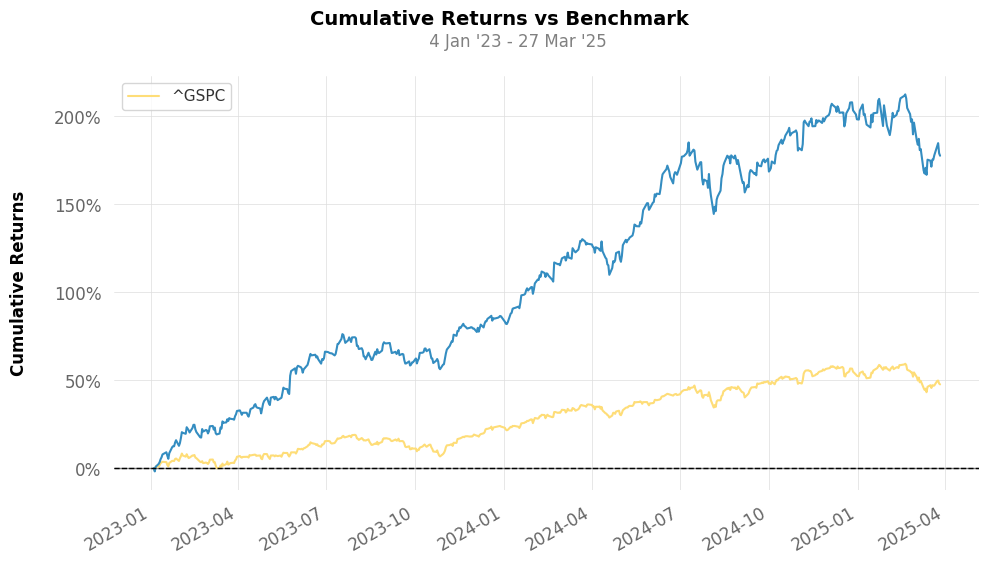


üìâ Drawdown


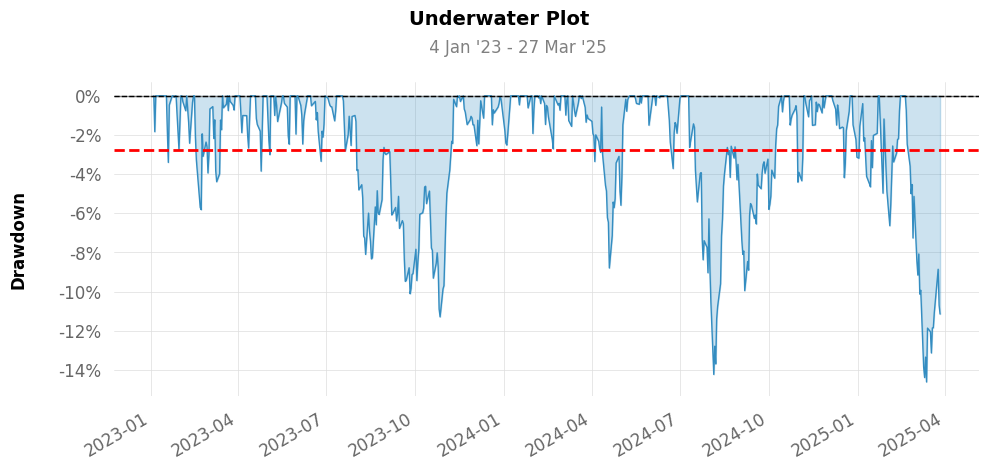


üóìÔ∏è Mapa de retornos mensuales
‚ö†Ô∏è Error en heatmap: module 'quantstats.plots' has no attribute 'monthly_returns_heatmap'

üìà Volatilidad m√≥vil (6 meses)


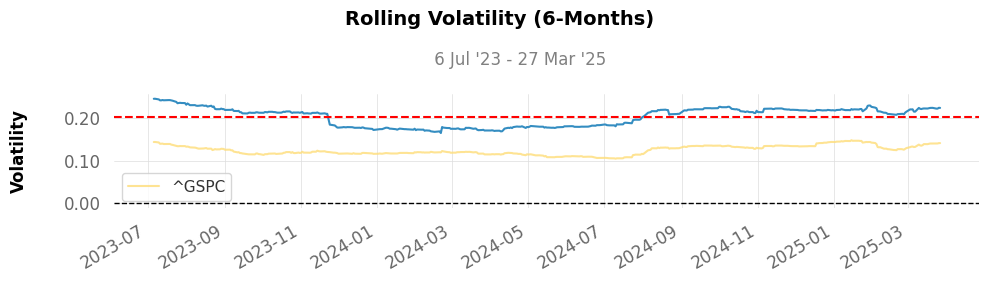


üìä Sharpe Ratio m√≥vil


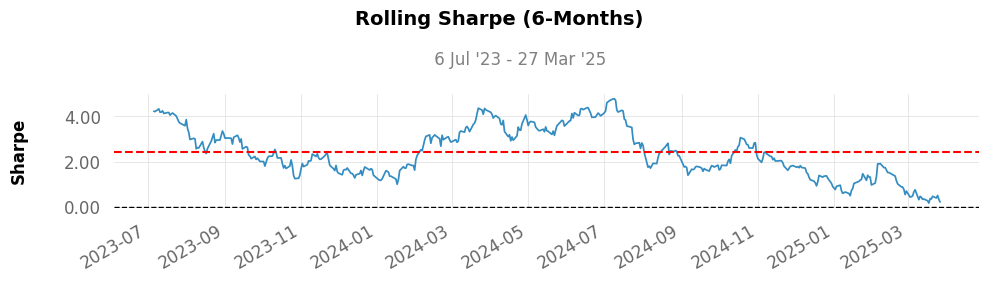


üìà Beta m√≥vil


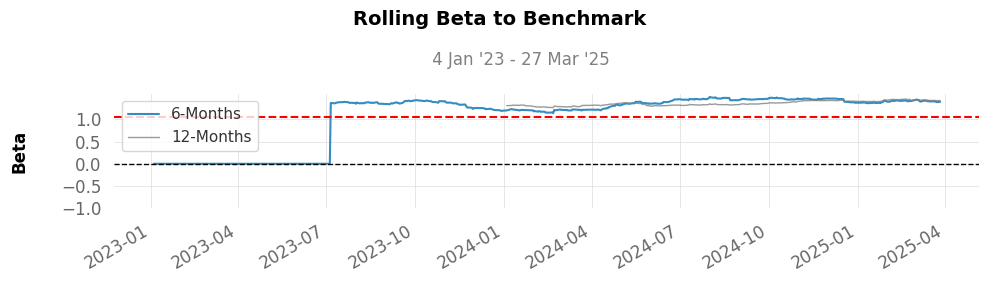


üîÅ Distribuci√≥n de retornos diarios


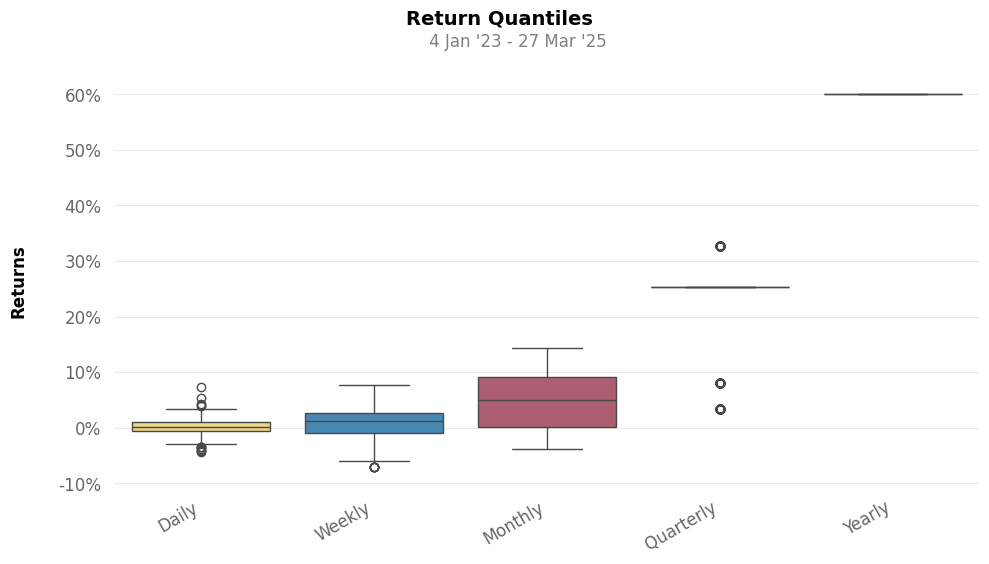

In [217]:
generar_reporte_basico(portfolio_returns, sp500_returns)


In [238]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from IPython.display import display

def calcular_metricas_riesgo_completo(portfolio_returns, benchmark_returns, risk_free_rate=0.0):
    # Normalizar fechas para evitar errores por diferencias en horas
    portfolio_returns.index = pd.to_datetime(portfolio_returns.index).normalize()
    benchmark_returns.index = pd.to_datetime(benchmark_returns.index).normalize()

    # Alinear por fechas comunes y eliminar valores nulos
    data = pd.concat([portfolio_returns, benchmark_returns], axis=1, join='inner').dropna()
    data.columns = ['Strategy', 'Benchmark']

    if data.empty:
        print("‚ö†Ô∏è No hay fechas en com√∫n entre el portafolio y el benchmark despu√©s de eliminar valores nulos.")
        print("üìÖ Rango de fechas del portafolio:", portfolio_returns.index.min(), "‚Üí", portfolio_returns.index.max())
        print("üìÖ Rango de fechas del benchmark :", benchmark_returns.index.min(), "‚Üí", benchmark_returns.index.max())
        return None

    # C√°lculo de m√©tricas para cada serie
    metrics = {}
    for col in data.columns:
        returns = data[col]
        mean_return = returns.mean()
        std_dev = returns.std()
        sharpe_ratio = (mean_return - risk_free_rate) / std_dev * np.sqrt(252)
        max_drawdown = (returns.cumsum() - returns.cumsum().cummax()).min()
        skewness = skew(returns)
        kurt = kurtosis(returns)

        X = data['Benchmark'].values.reshape(-1, 1)
        y = data[col].values.reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        beta = model.coef_[0][0]
        alpha = model.intercept_[0]

        metrics[col] = {
            'Retorno promedio diario': mean_return,
            'Volatilidad diaria': std_dev,
            'Sharpe Ratio (anualizado)': sharpe_ratio,
            'M√°ximo Drawdown': max_drawdown,
            'Skewness': skewness,
            'Kurtosis': kurt,
            'Beta': beta,
            'Alpha': alpha
        }

    # Convertir a DataFrame
    df_metrics = pd.DataFrame(metrics).round(4)

    print("üìä M√©tricas de rendimiento comparadas:")
    #display(df_metrics)

    return df_metrics


In [239]:
calcular_metricas_riesgo_completo(portfolio_returns, sp500_returns)


üìä M√©tricas de rendimiento comparadas:


Strategy  Benchmark
Retorno promedio diario      0.0019     0.0007
Volatilidad diaria           0.0136     0.0083
Sharpe Ratio (anualizado)    2.2385     1.4213
M√°ximo Drawdown             -0.1548    -0.1065
Skewness                     0.1758    -0.2713
Kurtosis                     1.7442     0.5903
Beta                         1.3747     1.0000
Alpha                        0.0009     0.0000

| M√©trica                       | Interpretaci√≥n                                                     | Observaci√≥n                                                                                                                       |
| ----------------------------- | ------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------- |
| **Retorno promedio diario**   | Mide el rendimiento promedio diario.                               | El portafolio (0.0019) supera claramente al benchmark (0.0007), lo cual es positivo.                                              |
| **Volatilidad diaria**        | Representa el riesgo o variabilidad de los retornos.               | Mayor en el portafolio (0.0136 vs 0.0083), lo cual implica m√°s riesgo.                                                            |
| **Sharpe Ratio (anualizado)** | Retorno ajustado por riesgo; >1 es bueno, >2 excelente.            | El portafolio tiene un Sharpe muy s√≥lido (2.24), superior al benchmark (1.39), indicando mejor compensaci√≥n por unidad de riesgo. |
| **M√°ximo Drawdown**           | P√©rdida m√°xima desde un pico.                                      | El portafolio cae m√°s (-15.48% vs -10.65%), reflejando mayor exposici√≥n a ca√≠das abruptas.                                        |
| **Skewness**                  | Asimetr√≠a en los retornos; positivo indica colas hacia la derecha. | El portafolio tiene sesgo positivo (0.18), lo cual es deseable; el benchmark tiene sesgo negativo.                                |
| **Kurtosis**                  | Mide colas pesadas; >3 implica m√°s eventos extremos.               | Ambos valores < 3 sugieren una distribuci√≥n algo m√°s normal que lo t√≠pico en mercados (aunque sigue habiendo eventos extremos).   |
| **Beta**                      | Sensibilidad al mercado; >1 implica m√°s volatilidad.               | El portafolio es 37% m√°s vol√°til que el mercado (beta = 1.37), lo que concuerda con su mayor retorno y drawdown.                  |
| **Alpha**                     | Rendimiento extra ajustado por riesgo.                             | Ligero alpha positivo (0.0009) indica que el portafolio aporta valor adicional frente al riesgo sistem√°tico.                      |


El portafolio tiene mayor retorno y mayor riesgo que el benchmark, lo que se refleja en su:

Alta volatilidad,

Mayor drawdown, y

Sharpe superior, lo cual indica que ese riesgo ha sido bien compensado.

Adem√°s, su sesgo positivo y ligero alpha positivo sugieren que el portafolio est√° bien construido, aunque podr√≠a beneficiarse de ajustes para reducir su sensibilidad al mercado (beta) y drawdown sin sacrificar demasiado rendimiento.

## Optimizaci√≥n de Portafolios
La optimizaci√≥n de portafolios es un proceso fundamental en finanzas que busca encontrar la combinaci√≥n ideal de activos que maximice el rendimiento esperado para un nivel dado de riesgo, o bien, que minimice el riesgo para un nivel espec√≠fico de rendimiento. Esta t√©cnica se basa en la teor√≠a moderna de portafolio desarrollada por Harry Markowitz, la cual plantea que un portafolio bien diversificado puede ofrecer mejores resultados ajustados al riesgo que invertir en activos individuales. Para ello, se consideran variables como los retornos esperados, la volatilidad de cada activo y las correlaciones entre ellos. A trav√©s de herramientas como PyPortfolioOpt, es posible implementar de forma pr√°ctica modelos de optimizaci√≥n que ayudan a tomar decisiones informadas al construir portafolios eficientes y alineados con los objetivos y tolerancia al riesgo del inversionista.

In [240]:
import yfinance as yf
import pandas as pd

# Definir fechas
start_date = '2023-01-01'
end_date = '2025-03-31'

# Descargar datos uno por uno con auto_adjust=False
aapl = yf.download('AAPL', start=start_date, end=end_date, auto_adjust=False)
aapl['Ticker'] = 'AAPL'

msft = yf.download('MSFT', start=start_date, end=end_date, auto_adjust=False)
msft['Ticker'] = 'MSFT'

nvda = yf.download('NVDA', start=start_date, end=end_date, auto_adjust=False)
nvda['Ticker'] = 'NVDA'

jpm = yf.download('JPM', start=start_date, end=end_date, auto_adjust=False)
jpm['Ticker'] = 'JPM'

# Mostrar las primeras filas de AAPL como ejemplo
aapl.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.632523  125.070000  130.899994  124.169998  130.279999   
2023-01-04  124.907700  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.583099  125.019997  127.769997  124.760002  127.129997   
2023-01-06  128.130219  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.654144  130.149994  133.410004  129.889999  130.470001   

Price          Volume Ticker  
Ticker           AAPL         
Date                          
2023-01-03  112117500   AAPL  
2023-01-04   89113600   AAPL  
2023-01-05   80962700   AAPL  
2023-01-06   87754700   AAPL  
2023-01-09   70790800   AAPL

In [241]:
# Extraer solo la columna de precios ajustados
aapl_prices = aapl['Adj Close']
msft_prices = msft['Adj Close']
nvda_prices = nvda['Adj Close']
jpm_prices  = jpm['Adj Close']

# Renombrar las series
aapl_prices.name = 'AAPL'
msft_prices.name = 'MSFT'
nvda_prices.name = 'NVDA'
jpm_prices.name  = 'JPM'

# Concatenar en un √∫nico DataFrame de precios ajustados
price_df = pd.concat([aapl_prices, msft_prices, nvda_prices, jpm_prices], axis=1)

# Verificar el resultado
price_df.head()


Ticker            AAPL        MSFT       NVDA         JPM
Date                                                     
2023-01-03  123.632523  235.240005  14.303279  126.709831
2023-01-04  124.907700  224.949890  14.736924  127.891441
2023-01-05  123.583099  218.282883  14.253322  127.863075
2023-01-06  128.130219  220.855408  14.846834  130.309830
2023-01-09  128.654144  223.005737  15.615206  129.771362

In [242]:
mu = expected_returns.mean_historical_return(price_df, frequency=252)
S = risk_models.sample_cov(price_df, frequency=252)

print(f'Mu :{mu}')

print(f'S:{S}')

Mu :Ticker
AAPL    0.290494
MSFT    0.239095
NVDA    1.500884
JPM     0.336403
dtype: float64
S:Ticker      AAPL      MSFT      NVDA       JPM
Ticker                                        
AAPL    0.049736  0.025472  0.036970  0.008407
MSFT    0.025472  0.053126  0.062008  0.007798
NVDA    0.036970  0.062008  0.276294  0.020228
JPM     0.008407  0.007798  0.020228  0.050343


In [243]:
# 3. Inicializar el modelo de frontera eficiente y optimizar con Sharpe Ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

In [244]:
# 4. Limpiar los pesos (redondea y elimina valores muy peque√±os)
clean_weights = ef.clean_weights()
print("Pesos √≥ptimos:\n", clean_weights)

Pesos √≥ptimos:
 OrderedDict([('AAPL', 0.13252), ('MSFT', 0.0), ('NVDA', 0.45429), ('JPM', 0.41319)])


In [245]:
# 5. Construir nuevo portafolio optimizado con los pesos calculados
# Suponiendo que los retornos diarios de las acciones individuales ya est√°n definidos:
optimized_portfolio = sum([retornos[ticker] * weight for ticker, weight in clean_weights.items()])




üìä Retornos acumulados


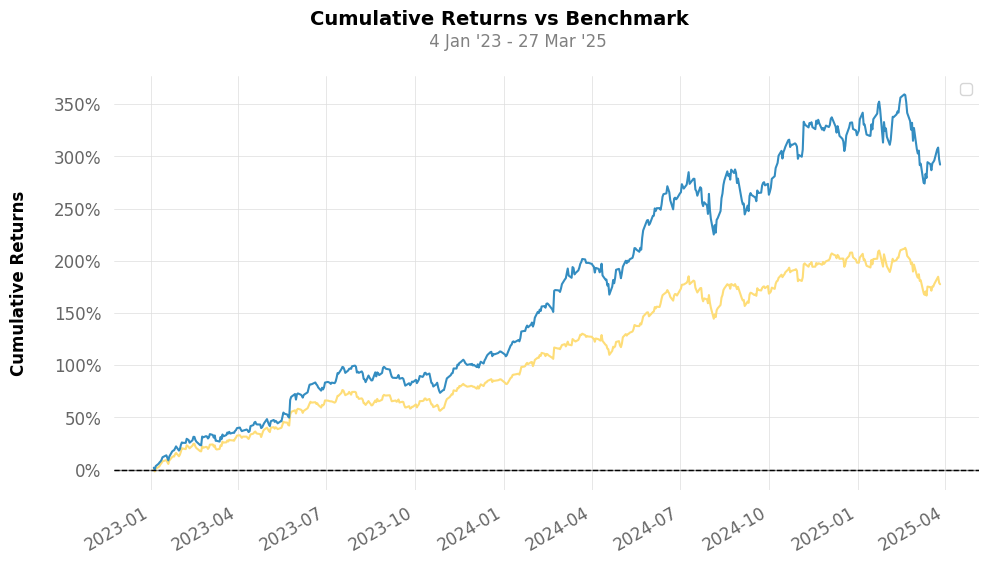


üìâ Drawdown


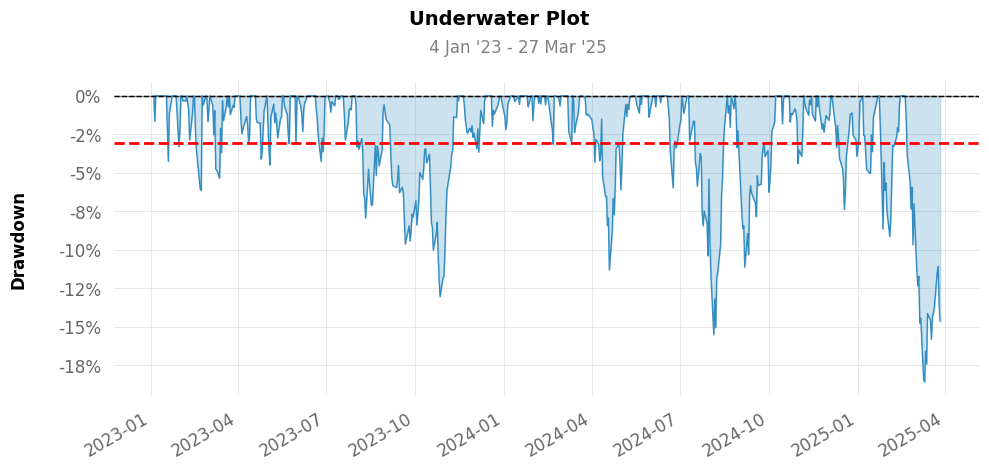


üóìÔ∏è Mapa de retornos mensuales
‚ö†Ô∏è Error en heatmap: module 'quantstats.plots' has no attribute 'monthly_returns_heatmap'

üìà Volatilidad m√≥vil (6 meses)


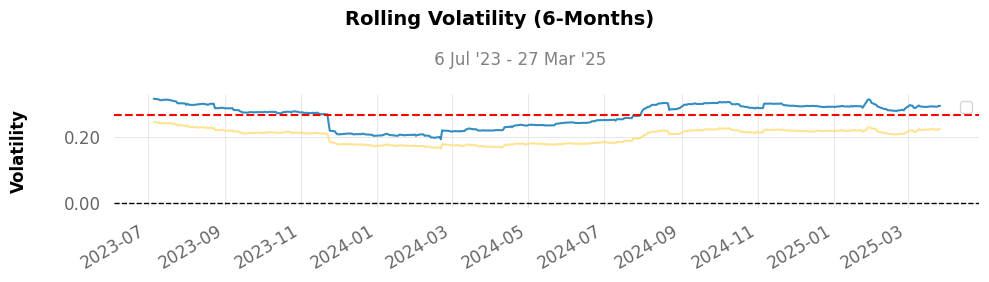


üìä Sharpe Ratio m√≥vil


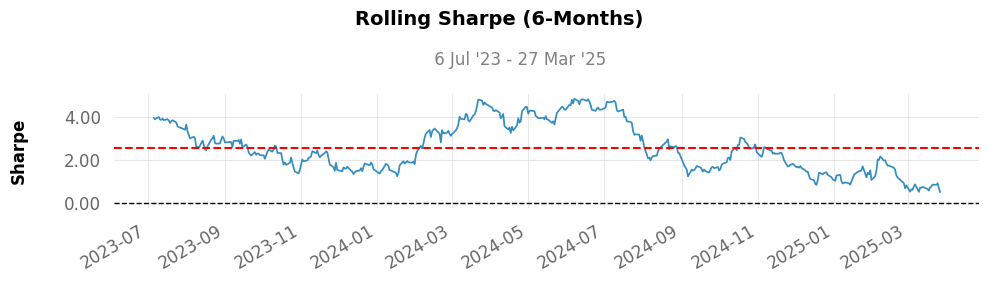


üìà Beta m√≥vil


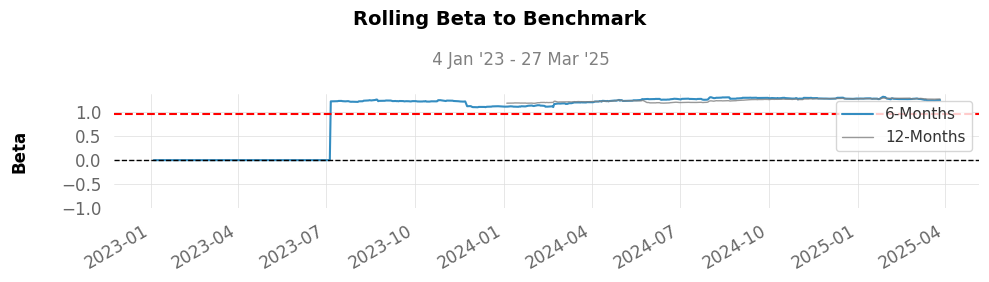


üîÅ Distribuci√≥n de retornos diarios


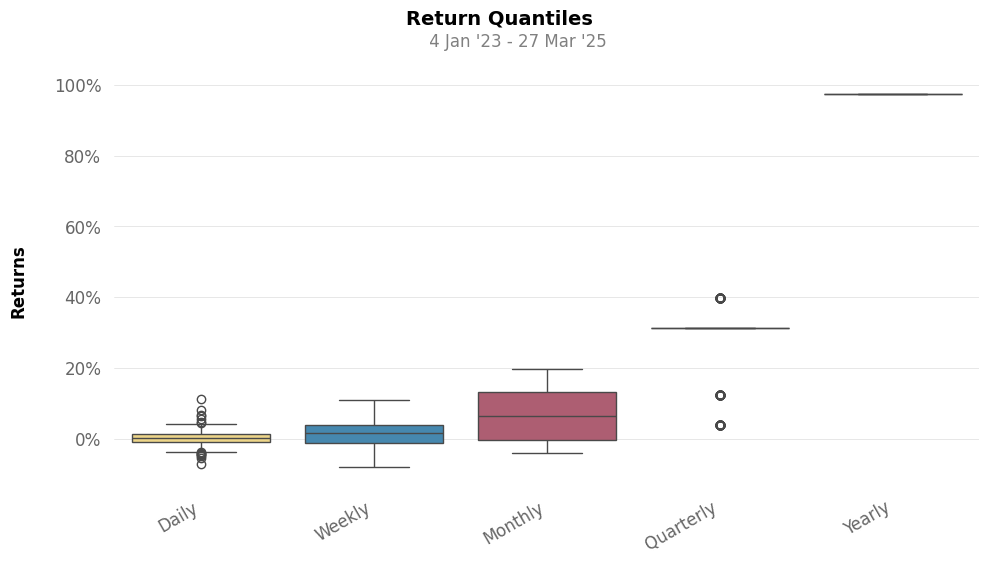

In [246]:
# 6. Evaluar el nuevo portafolio contra el portafolio inicial (benchmark)
generar_reporte_basico(optimized_portfolio, portfolio_returns)


In [250]:
# Calculamos las medidas de rendimiento entre el primer portafolio y el portafolio optimizado

calcular_metricas_riesgo_completo(optimized_portfolio, portfolio_returns)

üìä M√©tricas de rendimiento comparadas:


Strategy  Benchmark
Retorno promedio diario      0.0026     0.0019
Volatilidad diaria           0.0177     0.0136
Sharpe Ratio (anualizado)    2.3290     2.2385
M√°ximo Drawdown             -0.2005    -0.1548
Skewness                     0.4604     0.1758
Kurtosis                     3.7821     1.7442
Beta                         1.2349     1.0000
Alpha                        0.0002     0.0000

| M√©trica                     | Portafolio √ìptimo (`Strategy`) | Portafolio Inicial (`Benchmark`) |
| --------------------------- | ------------------------------ | -------------------------------- |
| **Retorno promedio diario** | 0.0026 (0.26%)                 | 0.0019 (0.19%)                   |
| **Volatilidad diaria**      | 0.0177                         | 0.0136                           |
| **Sharpe Ratio anualizado** | **2.3290**                     | 2.2385                           |
| **M√°ximo Drawdown**         | -20.05%                        | -15.48%                          |
| **Skewness**                | 0.4604                         | 0.1758                           |
| **Kurtosis**                | 3.7821                         | 1.7442                           |
| **Beta**                    | 1.2349                         | 1.0000                           |
| **Alpha**                   | 0.0002                         | 0.0000                           |


Observaciones:
‚úÖ Mejor rendimiento esperado: El portafolio optimizado logra un retorno promedio diario superior al benchmark (0.26% vs 0.19%).

‚úÖ Sharpe Ratio mayor: Esto indica una mejor relaci√≥n rendimiento/riesgo, a pesar del ligero incremento en la volatilidad.

‚ö†Ô∏è Mayor riesgo extremo: El Drawdown m√°ximo es m√°s profundo, sugiriendo que, si bien la rentabilidad esperada es mayor, tambi√©n lo es la exposici√≥n a ca√≠das significativas.

üìà Mayor asimetr√≠a y colas pesadas: El aumento en Skewness y Kurtosis implica un comportamiento m√°s riesgoso y menos sim√©trico que el benchmark.

üî∫ Beta superior a 1: Indica mayor sensibilidad al mercado. El portafolio tiende a amplificar los movimientos del benchmark.

üí° Interpretaci√≥n final:
El portafolio optimizado logra mejor rentabilidad ajustada por riesgo en t√©rminos del Sharpe Ratio, pero conlleva mayor exposici√≥n a eventos extremos y mayor sensibilidad al mercado. Este resultado es coherente con un perfil de inversionista que busca mejorar su retorno asumiendo riesgos adicionales de manera controlada.

#Introducci√≥n al Modelo Black-Litterman
El modelo Black-Litterman, propuesto en 1992 por Fischer Black y Robert Litterman (de Goldman Sachs), es un enfoque bayesiano para la asignaci√≥n √≥ptima de activos. A diferencia del modelo de media-varianza tradicional de Markowitz, Black-Litterman permite incorporar de forma estructurada las opiniones del inversionista en la construcci√≥n del portafolio.

Este modelo parte de una distribuci√≥n a priori de los rendimientos esperados, que se basa en el equilibrio del mercado (por ejemplo, las ponderaciones del √≠ndice de mercado), y la combina con las opiniones subjetivas del inversionista sobre ciertos activos, ponderadas seg√∫n el grado de confianza en dichas opiniones. El resultado es una distribuci√≥n a posteriori de rendimientos esperados m√°s robusta y realista.

üìå Elementos clave del modelo:
Pi (œÄ): Retornos impl√≠citos del mercado, calculados a partir de la aversi√≥n al riesgo y las ponderaciones de capitalizaci√≥n.

Q: Vector que contiene las opiniones del inversionista (por ejemplo, "AAPL subir√° 5%").

P: Matriz que representa a qu√© activos aplican las opiniones.

Œ© (Omega): Matriz de covarianza de las opiniones, relacionada con el nivel de confianza.

El modelo es especialmente √∫til en contextos donde se desea:

Evitar estimaciones inestables de retornos esperados.

Incorporar creencias informadas o conocimiento externo.

Obtener portafolios diversificados, estables y realistas.



In [252]:
import yfinance as yf
import pandas as pd

# Lista de acciones
tickers = ['AAPL', 'MSFT', 'GOOG', 'NVDA']
benchmark_ticker = '^GSPC'

# Rango de fechas
start_date = '2023-01-01'
end_date = '2025-03-31'

# Descargar precios ajustados
data = yf.download(tickers + [benchmark_ticker], start=start_date, end=end_date, auto_adjust=False)['Adj Close']

# Separar precios de acciones y benchmark
price_df = data[tickers]
benchmark_prices = data[benchmark_ticker]

# Verificar los primeros valores
print("üìà Precios ajustados de acciones:")
print(price_df.head())

print("\nüìâ Precios ajustados del benchmark:")
print(benchmark_prices.head())


[*********************100%***********************]  5 of 5 completed

üìà Precios ajustados de acciones:
Ticker            AAPL        MSFT       GOOG       NVDA
Date                                                    
2023-01-03  123.632523  235.240005  89.277145  14.303279
2023-01-04  124.907700  224.949890  88.291817  14.736924
2023-01-05  123.583099  218.282883  86.360947  14.253322
2023-01-06  128.130219  220.855408  87.744392  14.846834
2023-01-09  128.654144  223.005737  88.381378  15.615206

üìâ Precios ajustados del benchmark:
Date
2023-01-03    3824.139893
2023-01-04    3852.969971
2023-01-05    3808.100098
2023-01-06    3895.080078
2023-01-09    3892.090088
Name: ^GSPC, dtype: float64


¬øQu√© es œÄ?
En el modelo Black-Litterman, œÄ representa los retornos impl√≠citos del mercado. Estos se obtienen a partir de:

La aversi√≥n al riesgo del mercado (Œ¥, delta), que mide cu√°nto retorno exige el mercado por asumir riesgo.

La matriz de covarianza de los activos (Œ£).

Las ponderaciones de capitalizaci√≥n de mercado de los activos (w_mkt).

Se calcula con la f√≥rmula:

ùúã
=
ùõø
‚ãÖ
Œ£
‚ãÖ
ùë§
ùëö
ùëò
ùë°
œÄ=Œ¥‚ãÖŒ£‚ãÖw
mkt
‚Äã



¬øQu√© necesitamos?
Matriz de covarianza de precios (Œ£)

Market caps de las acciones (puedes asignarlas manualmente si no las extraes autom√°ticamente).

Delta: aversi√≥n al riesgo, calculada a partir del benchmark (^GSPC) con market_implied_risk_aversion().

In [253]:
from pypfopt import risk_models, black_litterman

# 1. Calcular matriz de covarianza anualizada (Œ£)
S = risk_models.sample_cov(price_df, frequency=252)

# 2. Definir capitalizaci√≥n de mercado (valores simulados en USD)
market_caps = {
    'AAPL': 2.5e12,
    'MSFT': 2.2e12,
    'GOOG': 1.6e12,
    'NVDA': 1.1e12
}

# 3. Calcular delta (aversi√≥n al riesgo del mercado) usando el benchmark
delta = black_litterman.market_implied_risk_aversion(benchmark_prices)

# 4. Calcular retornos impl√≠citos del mercado (œÄ)
pi = black_litterman.market_implied_prior_returns(market_caps, delta, S)

# Mostrar resultados
print("üìå Aversi√≥n al riesgo del mercado (delta):", round(delta, 4))
print("\nüìà Retornos impl√≠citos del mercado (œÄ):")
print(pi)


üìå Aversi√≥n al riesgo del mercado (delta): 10.1153

üìà Retornos impl√≠citos del mercado (œÄ):
Ticker
AAPL    0.366112
MSFT    0.419692
GOOG    0.491729
NVDA    0.859591
dtype: float64


¬øQu√© son las views en Black-Litterman?
Son las opiniones subjetivas del inversionista sobre el comportamiento futuro de uno o varios activos. Estas se expresan con:

P: matriz que indica a qu√© activos afecta cada opini√≥n.

Q: vector con los valores esperados de retorno para esas opiniones.

Œ©: matriz de varianzas (confianza), que indica cu√°nta certeza tiene el inversionista en cada view.

üìò Ejemplo t√≠pico
Supongamos que crees lo siguiente:

"MSFT tendr√° un 4% m√°s de rendimiento que AAPL".

"GOOG tendr√° un retorno absoluto de 6%".

Eso se traduce as√≠:

P = [[-1, 1, 0, 0], [0, 0, 1, 0]]

Q = [0.04, 0.06]



In [254]:
import numpy as np

# Definir views:
# View 1: MSFT - AAPL = 4% esperado
# View 2: GOOG = 6% retorno absoluto

P = np.array([
    [-1, 1, 0, 0],  # MSFT > AAPL
    [0, 0, 1, 0]    # GOOG retorno absoluto
])

Q = np.array([
    0.04,  # 4% de diferencia entre MSFT y AAPL
    0.06   # 6% de retorno esperado para GOOG
])


**#Construcci√≥n del modelo Black-Litterman combinando:**

Los retornos impl√≠citos del mercado (œÄ)

La matriz de covarianza (Œ£)

Tus opiniones (P, Q)

El nivel de confianza (usaremos el enfoque de Idzorek para simplificar)

In [256]:
from pypfopt.black_litterman import BlackLittermanModel

# Define absolute views as a dictionary
absolute_views = {
    "MSFT": 0.10,  # Expected return for MSFT
    "GOOG": 0.06   # Expected return for GOOG
}

# 1. Construir el modelo Black-Litterman con views e incertidumbre tipo "idzorek"
bl = BlackLittermanModel(
    cov_matrix=S,
    pi=pi,
    absolute_views=absolute_views,  # Pass the absolute_views dictionary
    Q=Q,
    P=P,
    omega="idzorek",
    view_confidences=[0.75, 0.60],
)

# 2. Obtener los retornos combinados (posteriori) y la matriz de covarianza ajustada
bl_return = bl.bl_returns()
bl_cov = bl.bl_cov()

# Ver resultados
print("üìà Retornos Black-Litterman (posteriori):")
print(bl_return)

print("\nüìä Matriz de covarianza combinada:")
print(bl_cov)

üìà Retornos Black-Litterman (posteriori):
Ticker
AAPL    0.217313
MSFT    0.160845
GOOG    0.182644
NVDA    0.520700
dtype: float64

üìä Matriz de covarianza combinada:
Ticker      AAPL      MSFT      GOOG      NVDA
Ticker                                        
AAPL    0.051663  0.025733  0.029612  0.037525
MSFT    0.025733  0.053757  0.036624  0.062683
GOOG    0.029612  0.036624  0.089371  0.060694
NVDA    0.037525  0.062683  0.060694  0.287084


In [257]:
from pypfopt.efficient_frontier import EfficientFrontier

# 1. Crear frontera eficiente con Black-Litterman (retornos y covarianza)
ef = EfficientFrontier(bl_return, bl_cov)

# 2. Maximizar el Sharpe ratio
bl_weights = ef.max_sharpe()

# 3. Limpiar los pesos para redondearlos
bl_clean_weights = ef.clean_weights()

# 4. Mostrar los pesos √≥ptimos
print("üéØ Pesos del portafolio Black-Litterman:")
for ticker, weight in bl_clean_weights.items():
    print(f"{ticker}: {round(weight * 100, 2)}%")

# 5. Mostrar m√©tricas esperadas del portafolio
ef.portfolio_performance(verbose=True)


üéØ Pesos del portafolio Black-Litterman:
AAPL: 68.76%
MSFT: 0.0%
GOOG: 1.1%
NVDA: 30.14%
Expected annual return: 30.8%
Annual volatility: 25.9%
Sharpe Ratio: 1.19


(np.float64(0.3083761132391971),
 np.float64(0.2586924177368332),
 np.float64(1.1920570225328635))

In [258]:
# Asegurarte de tener los retornos diarios de las acciones
daily_returns = price_df.pct_change().dropna()

# Construir el portafolio usando los pesos de Black-Litterman
bl_portfolio_returns = sum([
    daily_returns[ticker] * weight for ticker, weight in bl_clean_weights.items()
])

# Eliminar posibles valores nulos
bl_portfolio_returns = bl_portfolio_returns.dropna()

# Renombrar la serie
bl_portfolio_returns.name = "Portafolio_Black_Litterman"

# Mostrar primeros valores
bl_portfolio_returns.head()


Date
2023-01-04    0.016109
2023-01-05   -0.017423
2023-01-06    0.038027
2023-01-09    0.018490
2023-01-10    0.008538
Name: Portafolio_Black_Litterman, dtype: float64


üìä Retornos acumulados


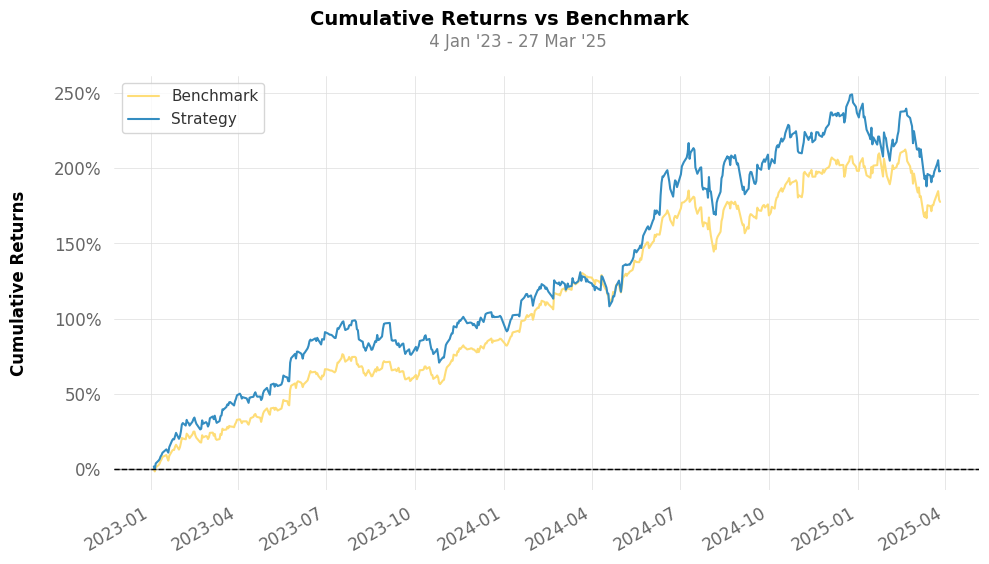


üìâ Drawdown


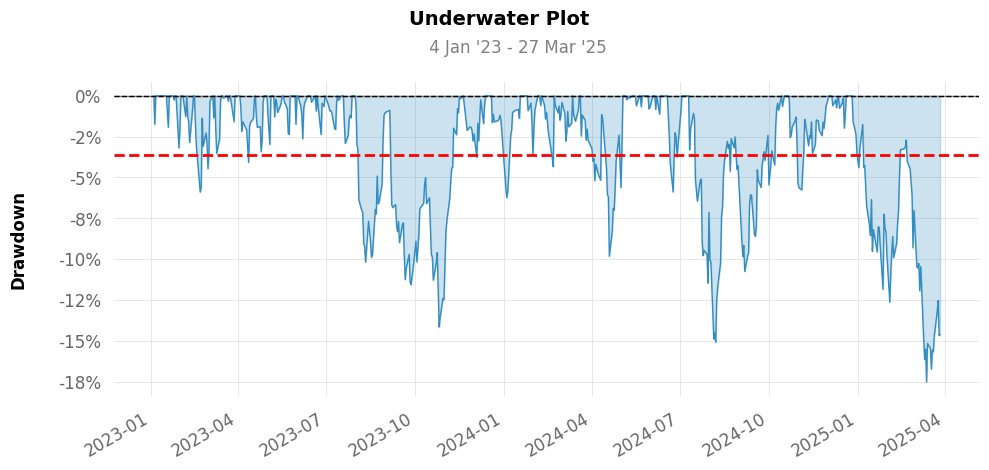


üóìÔ∏è Mapa de retornos mensuales
‚ö†Ô∏è Error en heatmap: module 'quantstats.plots' has no attribute 'monthly_returns_heatmap'

üìà Volatilidad m√≥vil (6 meses)


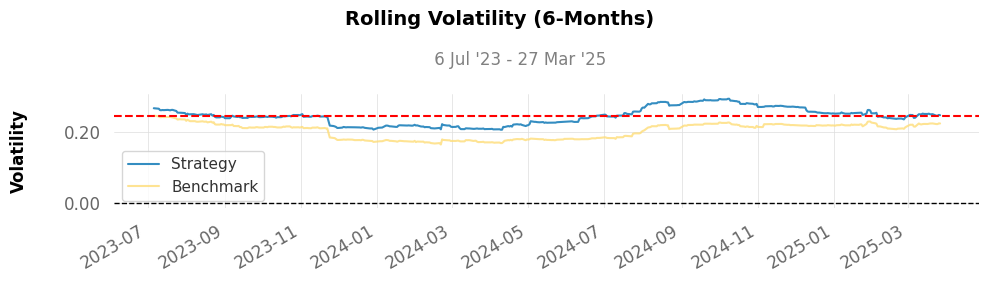


üìä Sharpe Ratio m√≥vil


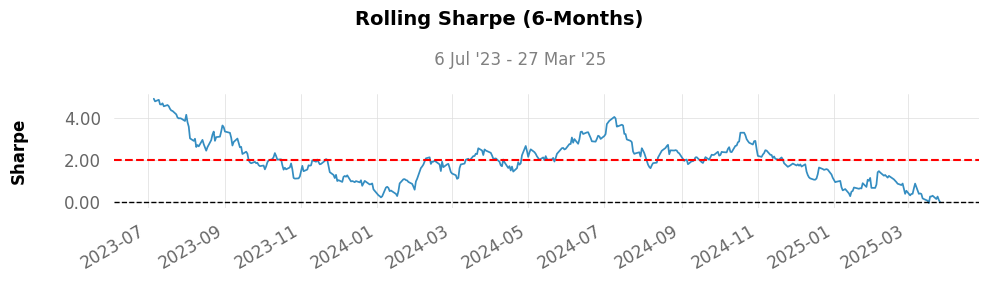


üìà Beta m√≥vil


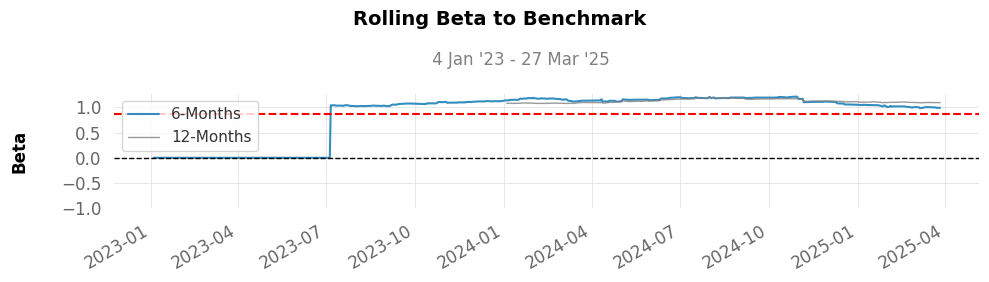


üîÅ Distribuci√≥n de retornos diarios


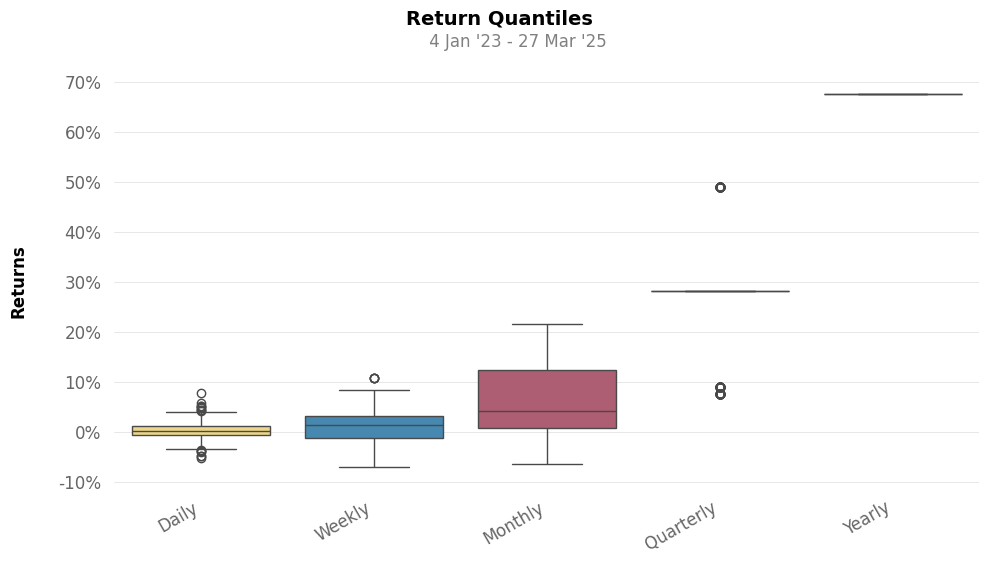

üìä M√©tricas de rendimiento comparadas:


Strategy  Benchmark
Retorno promedio diario      0.0021     0.0019
Volatilidad diaria           0.0160     0.0136
Sharpe Ratio (anualizado)    2.0656     2.2385
M√°ximo Drawdown             -0.1828    -0.1548
Skewness                     0.1743     0.1758
Kurtosis                     1.5315     1.7442
Beta                         1.0846     1.0000
Alpha                        0.0000     0.0000

In [261]:
# Asegurar que ambos est√©n en las mismas fechas (eliminar diferencias por zona horaria y hora)
bl_portfolio_returns.index = pd.to_datetime(bl_portfolio_returns.index).normalize()

# Si est√°s comparando contra el SP500
#sp500_returns.index = pd.to_datetime(sp500_returns.index).normalize()

# Si est√°s comparando contra el portafolio con pesos iguales
portfolio_returns.index = pd.to_datetime(portfolio_returns.index).normalize()


# Alinear por fechas comunes
combined = pd.concat([bl_portfolio_returns, portfolio_returns], axis=1, join='inner').dropna()
combined.columns = ['Strategy', 'Benchmark']

# Separar
strategy = combined['Strategy']
benchmark = combined['Benchmark']

# Comparar con funciones personalizadas
generar_reporte_basico(strategy, benchmark)
calcular_metricas_riesgo_completo(strategy, benchmark)


In [263]:
# Asegurar que ambos est√©n alineados por fechas
bl_portfolio_returns.index = pd.to_datetime(bl_portfolio_returns.index).normalize()
portfolio_returns.index = pd.to_datetime(portfolio_returns.index).normalize()

# Concatenar las dos series y eliminar valores nulos
comparison_data = pd.concat([bl_portfolio_returns, portfolio_returns], axis=1, join='inner').dropna()
comparison_data.columns = ['Strategy', 'Benchmark']

# Calcular m√©tricas
calcular_metricas_riesgo_completo(
    comparison_data['Strategy'],
    comparison_data['Benchmark']
)


üìä M√©tricas de rendimiento comparadas:


Strategy  Benchmark
Retorno promedio diario      0.0021     0.0019
Volatilidad diaria           0.0160     0.0136
Sharpe Ratio (anualizado)    2.0656     2.2385
M√°ximo Drawdown             -0.1828    -0.1548
Skewness                     0.1743     0.1758
Kurtosis                     1.5315     1.7442
Beta                         1.0846     1.0000
Alpha                        0.0000     0.0000

| M√©trica                       | Strategy (BL) | Benchmark | Observaci√≥n                                                                                                                  |
| ----------------------------- | ------------- | --------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **Retorno promedio diario**   | 0.0021        | 0.0019    | La estrategia optimizada con Black-Litterman genera un retorno promedio diario ligeramente superior.                         |
| **Volatilidad diaria**        | 0.0160        | 0.0136    | El portafolio optimizado tiene mayor volatilidad, indicando un riesgo ligeramente m√°s alto.                                  |
| **Sharpe Ratio (anualizado)** | 2.0656        | 2.2385    | A pesar del mayor retorno, la eficiencia ajustada por riesgo es menor que el benchmark. El ratio Sharpe cay√≥.                |
| **M√°ximo Drawdown**           | -0.1828       | -0.1548   | El drawdown m√°ximo del portafolio Black-Litterman fue m√°s severo, lo que indica una mayor p√©rdida acumulada potencial.       |
| **Skewness**                  | 0.1743        | 0.1758    | Ambas distribuciones son ligeramente asim√©tricas hacia la derecha, sin diferencias relevantes.                               |
| **Kurtosis**                  | 1.5315        | 1.7442    | Ambos tienen colas ligeras comparadas con una distribuci√≥n normal (k=3), pero el benchmark presenta un poco m√°s de extremos. |
| **Beta**                      | 1.0846        | 1.0000    | El portafolio Black-Litterman tiene una sensibilidad ligeramente mayor al mercado.                                           |
| **Alpha**                     | 0.0000        | 0.0000    | No se observa alpha (exceso de retorno ajustado al riesgo) frente al benchmark.                                              |


Aunque el portafolio Black-Litterman logra un mayor retorno promedio diario, su Sharpe ratio es inferior al del benchmark, lo que indica que ese rendimiento adicional no compensa del todo el mayor riesgo incurrido. Adem√°s, el drawdown m√°s profundo refuerza que el perfil de riesgo del portafolio optimizado puede ser m√°s agresivo.

Conclusi√≥n: Esta versi√≥n de Black-Litterman mejora en rendimiento bruto pero pierde eficiencia ajustada por riesgo. Puede interesar si se prioriza retorno sobre estabilidad.